In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_flights = pd.read_csv('D://My/MO/flights.csv',nrows = 40000)
df_airport = pd.read_csv('D://My/MO/airports.csv')

In [3]:
df_flights.shape

(40000, 31)

In [4]:
df_airport.shape

(322, 7)

In [5]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_airport.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [7]:
df_airport.tail()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


In [8]:
df_flights.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
39995,2015,1,3,6,AA,1563,N426AA,TUL,DFW,1505,...,1646.0,26.0,0,0,NaN,0.0,0.0,0.0,26.0,0.0
39996,2015,1,3,6,AA,1544,N3LLAA,DFW,BOS,1505,...,1939.0,9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
39997,2015,1,3,6,AA,1510,N7BSAA,MIA,JFK,1505,...,2011.0,122.0,0,0,NaN,122.0,0.0,0.0,0.0,0.0
39998,2015,1,3,6,AS,633,N440AS,PHX,SEA,1505,...,1705.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
39999,2015,1,3,6,AS,641,N625AS,TUS,SEA,1505,...,1718.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 31 columns):
YEAR                   40000 non-null int64
MONTH                  40000 non-null int64
DAY                    40000 non-null int64
DAY_OF_WEEK            40000 non-null int64
AIRLINE                40000 non-null object
FLIGHT_NUMBER          40000 non-null int64
TAIL_NUMBER            39956 non-null object
ORIGIN_AIRPORT         40000 non-null object
DESTINATION_AIRPORT    40000 non-null object
SCHEDULED_DEPARTURE    40000 non-null int64
DEPARTURE_TIME         39098 non-null float64
DEPARTURE_DELAY        39098 non-null float64
TAXI_OUT               39084 non-null float64
WHEELS_OFF             39084 non-null float64
SCHEDULED_TIME         40000 non-null int64
ELAPSED_TIME           38995 non-null float64
AIR_TIME               38995 non-null float64
DISTANCE               40000 non-null int64
WHEELS_ON              39060 non-null float64
TAXI_IN                39060 non-null

In [10]:
df_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,40000.0,40000.0,40000.000000,40000.000000,40000.000000,40000.000000,39098.000000,39098.000000,39084.000000,39084.000000,...,40000.000000,39060.000000,38995.000000,40000.000000,40000.000000,10779.000000,10779.000000,10779.000000,10779.000000,10779.000000
mean,2015.0,1.0,1.883975,4.883975,2238.008550,1269.948700,1284.279221,12.556320,16.112834,1306.985211,...,1454.932925,1446.121377,10.006950,0.002050,0.023075,11.198070,0.097968,17.767604,19.991279,1.817330
std,0.0,0.0,0.753676,0.753676,1824.239862,462.294582,474.419114,37.332642,8.699097,474.164346,...,476.558224,498.573300,39.971901,0.045231,0.150144,19.730688,2.050679,43.217756,38.593570,12.116461
min,2015.0,1.0,1.000000,4.000000,1.000000,5.000000,1.000000,-39.000000,1.000000,1.000000,...,2.000000,1.000000,-54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,1.000000,4.000000,760.000000,900.000000,909.000000,-4.000000,11.000000,925.000000,...,1105.000000,1101.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,2.000000,5.000000,1680.000000,1230.000000,1246.000000,0.000000,14.000000,1258.000000,...,1437.000000,1440.000000,0.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000
75%,2015.0,1.0,2.000000,5.000000,3367.250000,1625.000000,1639.000000,15.000000,19.000000,1651.000000,...,1825.000000,1830.000000,17.000000,0.000000,0.000000,17.000000,0.000000,19.000000,25.000000,0.000000
max,2015.0,1.0,3.000000,6.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,...,2359.000000,2400.000000,1384.000000,1.000000,1.000000,570.000000,107.000000,1380.000000,891.000000,453.000000


In [11]:
df_airport = df_airport.dropna()
df_airport = df_airport.drop_duplicates()
df_airport = df_airport.reset_index(drop=True)

In [12]:
df_airport.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [13]:
df_airport.shape

(319, 7)

In [14]:
df_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
IATA_CODE    319 non-null object
AIRPORT      319 non-null object
CITY         319 non-null object
STATE        319 non-null object
COUNTRY      319 non-null object
LATITUDE     319 non-null float64
LONGITUDE    319 non-null float64
dtypes: float64(2), object(5)
memory usage: 17.5+ KB


In [15]:
df_flights.count()

YEAR                   40000
MONTH                  40000
DAY                    40000
DAY_OF_WEEK            40000
AIRLINE                40000
FLIGHT_NUMBER          40000
TAIL_NUMBER            39956
ORIGIN_AIRPORT         40000
DESTINATION_AIRPORT    40000
SCHEDULED_DEPARTURE    40000
DEPARTURE_TIME         39098
DEPARTURE_DELAY        39098
TAXI_OUT               39084
WHEELS_OFF             39084
SCHEDULED_TIME         40000
ELAPSED_TIME           38995
AIR_TIME               38995
DISTANCE               40000
WHEELS_ON              39060
TAXI_IN                39060
SCHEDULED_ARRIVAL      40000
ARRIVAL_TIME           39060
ARRIVAL_DELAY          38995
DIVERTED               40000
CANCELLED              40000
CANCELLATION_REASON      923
AIR_SYSTEM_DELAY       10779
SECURITY_DELAY         10779
AIRLINE_DELAY          10779
LATE_AIRCRAFT_DELAY    10779
WEATHER_DELAY          10779
dtype: int64

In [16]:
# 1
df1 = df_flights.copy()
print(len(df1[df1['CANCELLED'] ==1]))

923


In [17]:
# 2
df1 = df_flights.groupby('ORIGIN_AIRPORT')['CANCELLED'].sum().sort_values()
print("Наиболее часто рейсы отменяют в аэропорте " + str(df1.index[len(df1)-1]))

Наиболее часто рейсы отменяют в аэропорте DFW


In [27]:
df3 = df_flights.copy()

In [34]:
# 4
print('For AA kol-vo reysov: ' + str(len(df3[(df3['AIRLINE'] == 'AA')])))
print('Kol-vo cancelled reysov: ' + str(len(df3[(df3['CANCELLED'] == 1) & (df3['AIRLINE'] == 'AA')])))
print('Kol-vo diverted reysov: ' + str(len(df3[(df3['DIVERTED'] == 1) & (df3['AIRLINE'] == 'AA')])))
print('')
print('For UA kol-vo reysov: ' + str(len(df3[(df3['AIRLINE'] == 'UA')])))
print('Kol-vo cancelled reysov: ' + str(len(df3[(df3['CANCELLED'] == 1) & (df3['AIRLINE'] == 'UA')])))
print('Kol-vo diverted reysov: ' + str(len(df3[(df3['DIVERTED'] == 1) & (df3['AIRLINE'] == 'UA')])))
print('')
print('For US kol-vo reysov: ' + str(len(df3[(df3['AIRLINE'] == 'US')])))
print('Kol-vo cancelled reysov: ' + str(len(df3[(df3['CANCELLED'] == 1) & (df3['AIRLINE'] == 'Us')])))
print('Kol-vo diverted reysov: ' + str(len(df3[(df3['DIVERTED'] == 1) & (df3['AIRLINE'] == 'US')])))
print('')
print('For F9 kol-vo reysov: ' + str(len(df3[(df3['AIRLINE'] == 'F9')])))
print('Kol-vo cancelled reysov: ' + str(len(df3[(df3['CANCELLED'] == 1) & (df3['AIRLINE'] == 'F9')])))
print('Kol-vo diverted reysov: ' + str(len(df3[(df3['DIVERTED'] == 1) & (df3['AIRLINE'] == 'F9')])))
print('')
print('For B6 kol-vo reysov: ' + str(len(df3[(df3['AIRLINE'] == 'B6')])))
print('Kol-vo cancelled reysov: ' + str(len(df3[(df3['CANCELLED'] == 1) & (df3['AIRLINE'] == 'B6')])))
print('Kol-vo diverted reysov: ' + str(len(df3[(df3['DIVERTED'] == 1) & (df3['AIRLINE'] == 'B6')])))
print('')
print('For OO kol-vo reysov: ' + str(len(df3[(df3['AIRLINE'] == 'OO')])))
print('Kol-vo cancelled reysov: ' + str(len(df3[(df3['CANCELLED'] == 1) & (df3['AIRLINE'] == 'OO')])))
print('Kol-vo diverted reysov: ' + str(len(df3[(df3['DIVERTED'] == 1) & (df3['AIRLINE'] == 'OO')])))
print('')
print('For AS kol-vo reysov: ' + str(len(df3[(df3['AIRLINE'] == 'AS')])))
print('Kol-vo cancelled reysov: ' + str(len(df3[(df3['CANCELLED'] == 1) & (df3['AIRLINE'] == 'AS')])))
print('Kol-vo diverted reysov: ' + str(len(df3[(df3['DIVERTED'] == 1) & (df3['AIRLINE'] == 'AS')])))
print('')
print('For NK kol-vo reysov: ' + str(len(df3[(df3['AIRLINE'] == 'NK')])))
print('Kol-vo cancelled reysov: ' + str(len(df3[(df3['CANCELLED'] == 1) & (df3['AIRLINE'] == 'NK')])))
print('Kol-vo diverted reysov: ' + str(len(df3[(df3['DIVERTED'] == 1) & (df3['AIRLINE'] == 'NK')])))
print('')
print('For WN kol-vo reysov: ' + str(len(df3[(df3['AIRLINE'] == 'WN')])))
print('Kol-vo cancelled reysov: ' + str(len(df3[(df3['CANCELLED'] == 1) & (df3['AIRLINE'] == 'WN')])))
print('Kol-vo diverted reysov: ' + str(len(df3[(df3['DIVERTED'] == 1) & (df3['AIRLINE'] == 'WN')])))
print('')
print('For DL kol-vo reysov: ' + str(len(df3[(df3['AIRLINE'] == 'DL')])))
print('Kol-vo cancelled reysov: ' + str(len(df3[(df3['CANCELLED'] == 1) & (df3['AIRLINE'] == 'DL')])))
print('Kol-vo diverted reysov: ' + str(len(df3[(df3['DIVERTED'] == 1) & (df3['AIRLINE'] == 'DL')])))
print('')
print('For EV kol-vo reysov: ' + str(len(df3[(df3['AIRLINE'] == 'EV')])))
print('Kol-vo cancelled reysov: ' + str(len(df3[(df3['CANCELLED'] == 1) & (df3['AIRLINE'] == 'EV')])))
print('Kol-vo diverted reysov: ' + str(len(df3[(df3['DIVERTED'] == 1) & (df3['AIRLINE'] == 'EV')])))
print('')
print('For HA kol-vo reysov: ' + str(len(df3[(df3['AIRLINE'] == 'HA')])))
print('Kol-vo cancelled reysov: ' + str(len(df3[(df3['CANCELLED'] == 1) & (df3['AIRLINE'] == 'HA')])))
print('Kol-vo diverted reysov: ' + str(len(df3[(df3['DIVERTED'] == 1) & (df3['AIRLINE'] == 'HA')])))
print('')
print('For MQ kol-vo reysov: ' + str(len(df3[(df3['AIRLINE'] == 'MQ')])))
print('Kol-vo cancelled reysov: ' + str(len(df3[(df3['CANCELLED'] == 1) & (df3['AIRLINE'] == 'MQ')])))
print('Kol-vo diverted reysov: ' + str(len(df3[(df3['DIVERTED'] == 1) & (df3['AIRLINE'] == 'MQ')])))
print('')
print('For VX kol-vo reysov: ' + str(len(df3[(df3['AIRLINE'] == 'VX')])))
print('Kol-vo cancelled reysov: ' + str(len(df3[(df3['CANCELLED'] == 1) & (df3['AIRLINE'] == 'VX')])))
print('Kol-vo diverted reysov: ' + str(len(df3[(df3['DIVERTED'] == 1) & (df3['AIRLINE'] == 'VX')])))

KeyError: 'AIRLINE'

In [29]:
# 5

print('Рейс №   Скорость полета для каждого рейса')

#S =  'DISTANCE'/ ('DEPARTURE_TIME' - 'ARRIVAL_TIME')
df_flights['speed'] = df_flights['DISTANCE'] / (df_flights['ARRIVAL_TIME'] - df_flights['DEPARTURE_TIME'])
print(df_flights['speed']) 
print('')
print('Средняя скорость полета авиакомпаний')

df_flights['sred_speed'] = df_flights['speed'] / df_flights['AIRLINE']

print(df_flights['sred_speed'])

Рейс №   Скорость полета для каждого рейса
0        -0.744090
1         3.152909
2         2.895334
3         3.160594
4         6.161702
5         2.693220
6         2.651020
7         2.997179
8         2.853801
9         2.804173
10        2.794872
11        2.994490
12        2.692982
13        3.063584
14        2.700772
15        3.497585
16        3.447619
17        2.833622
18        3.344902
19        2.818182
20        2.692671
21        3.071026
22        2.470726
23        3.182065
24        2.932280
25        2.785859
26        3.500000
27        3.097917
28        2.975155
29        3.008803
           ...    
39970     3.049555
39971    -0.514894
39972     4.064000
39973     1.146853
39974     3.435897
39975   -45.666667
39976     4.437209
39977     3.525641
39978     1.668508
39979   -51.000000
39980    67.600000
39981     2.601732
39982     3.511811
39983     3.821918
39984     1.896552
39985     0.941725
39986     3.626728
39987     3.042781
39988     4.238356
39989  

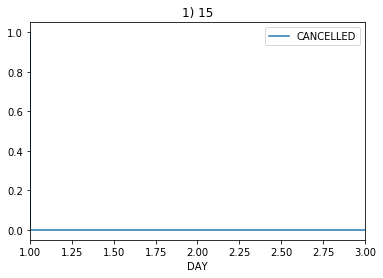

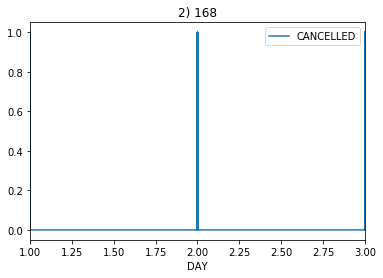

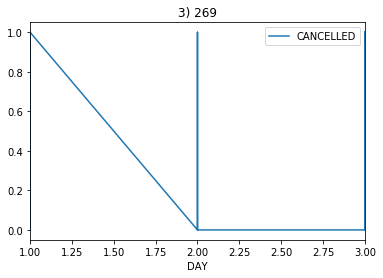

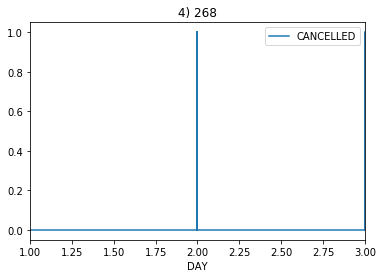

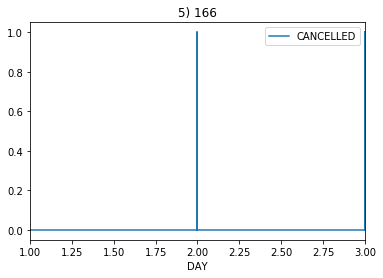

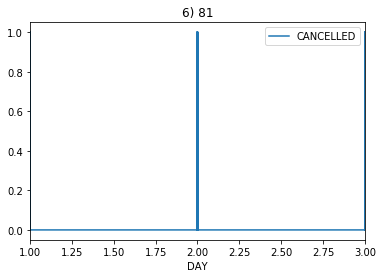

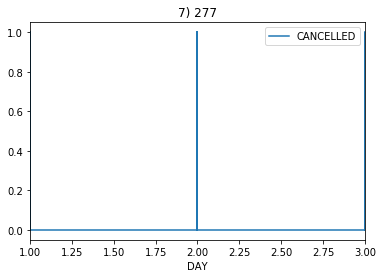

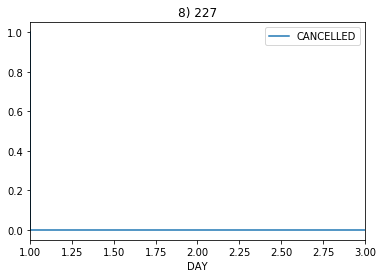

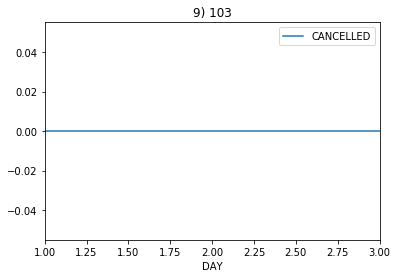

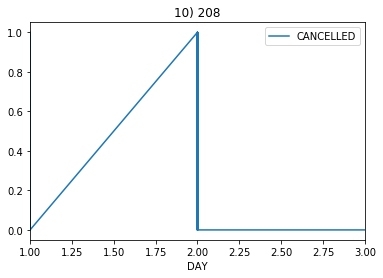

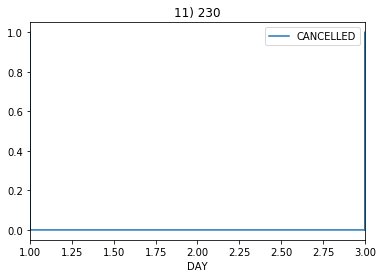

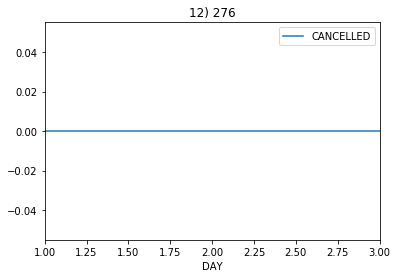

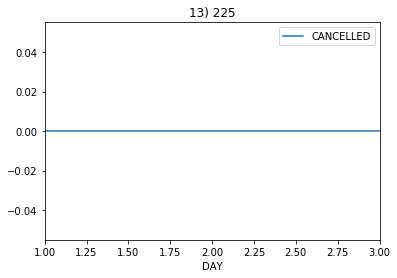

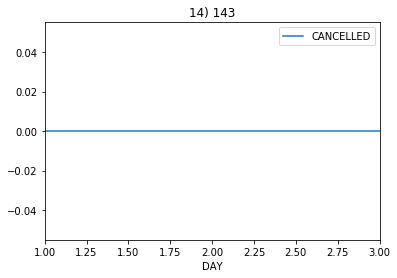

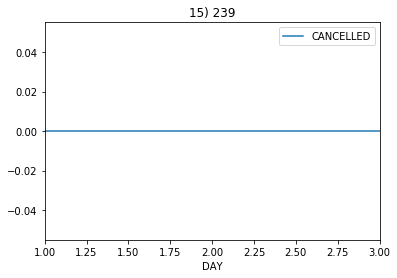

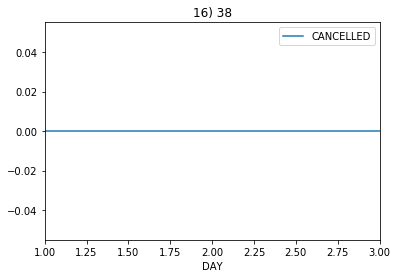

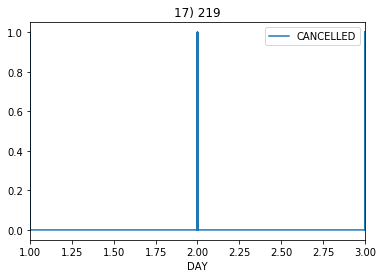

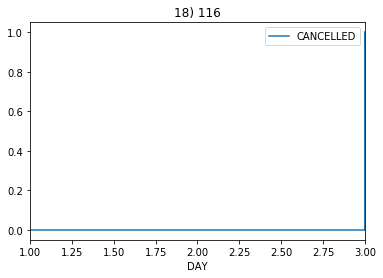

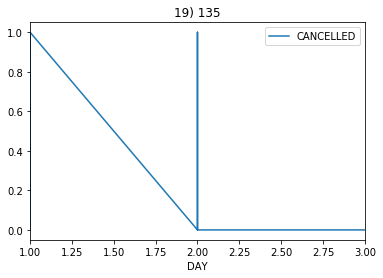

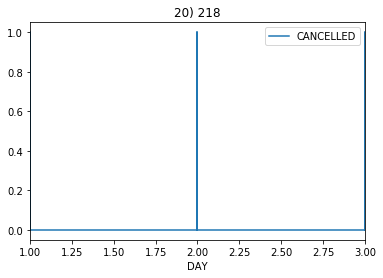

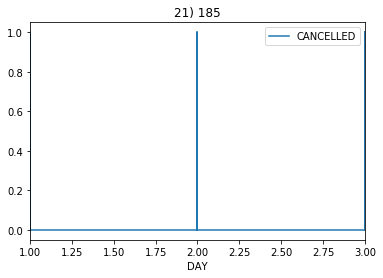

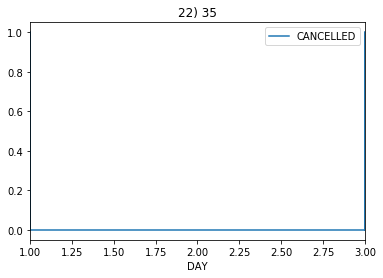

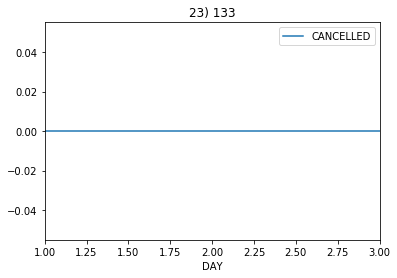

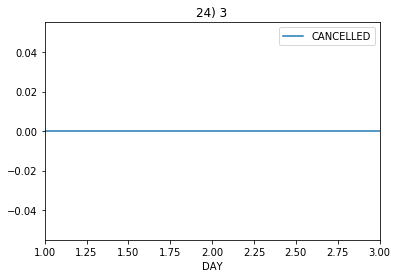

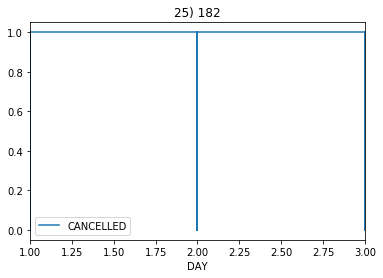

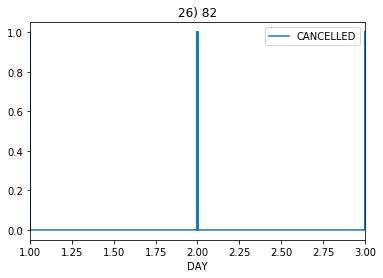

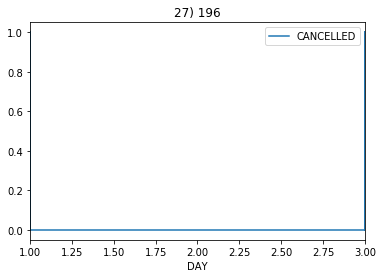

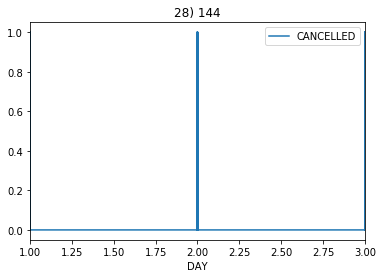

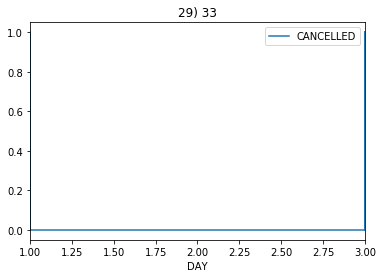

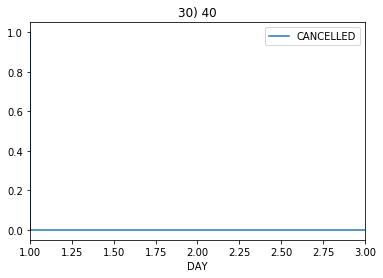

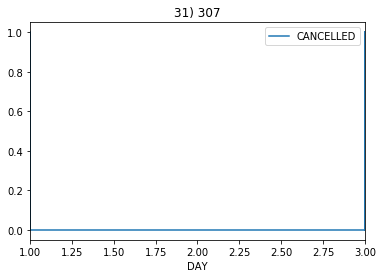

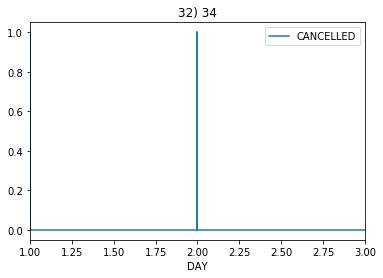

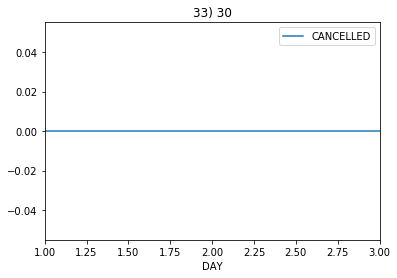

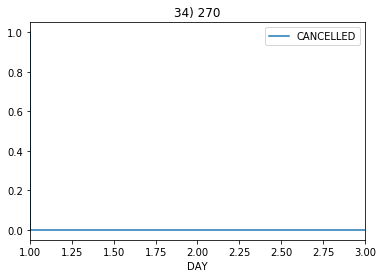

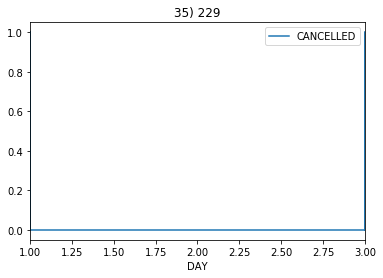

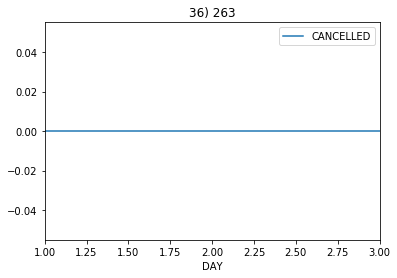

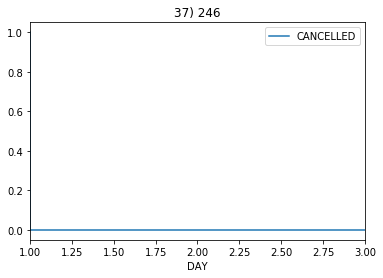

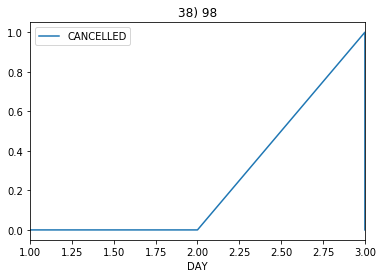

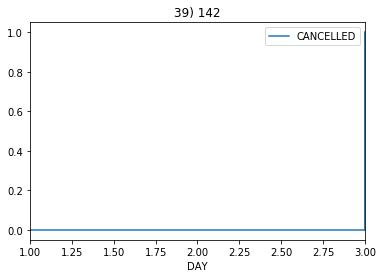

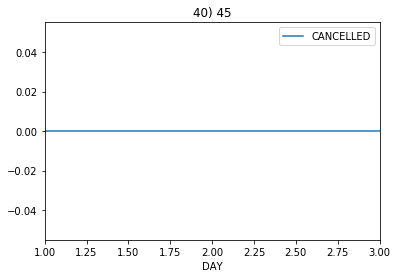

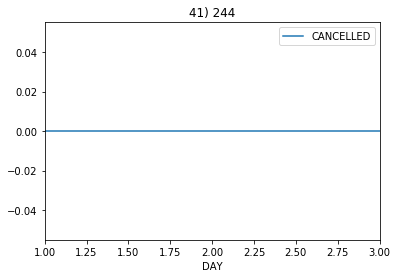

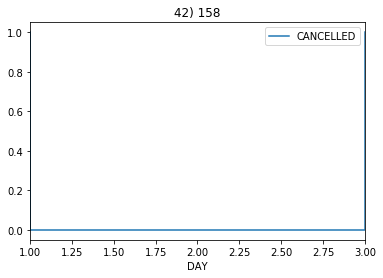

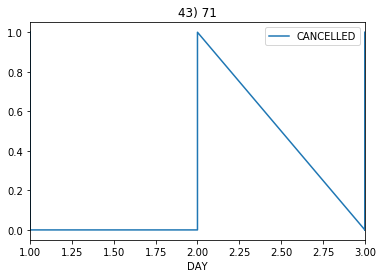

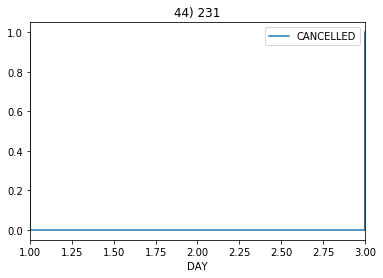

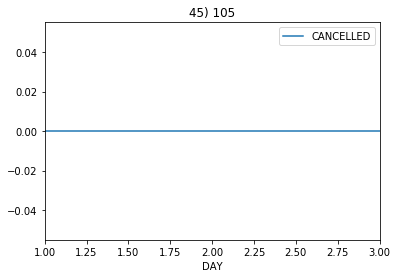

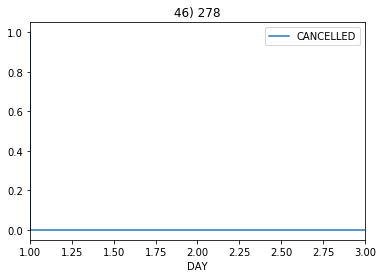

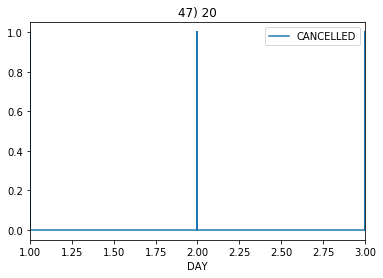

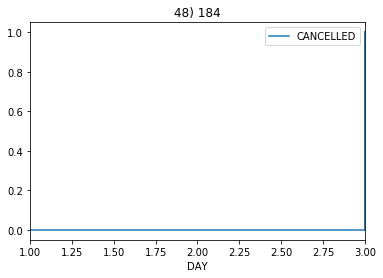

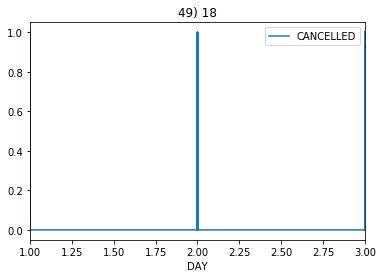

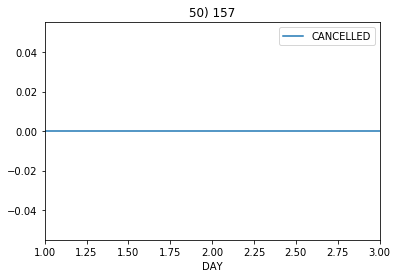

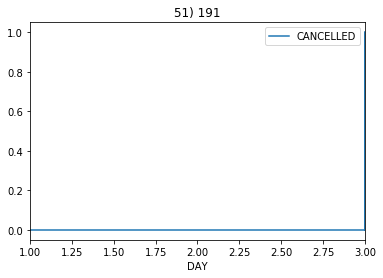

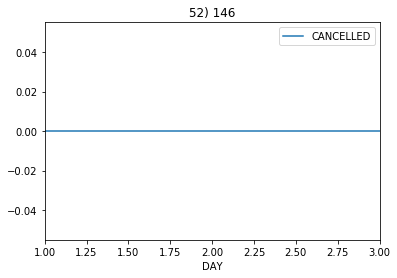

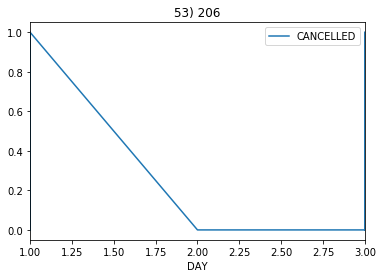

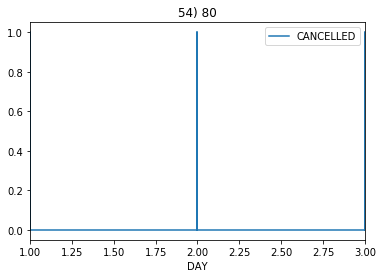

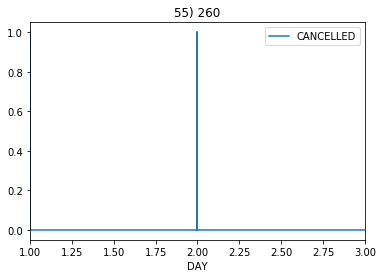

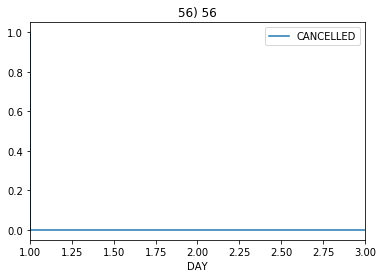

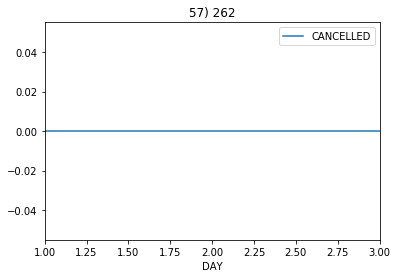

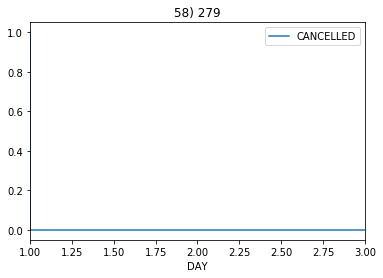

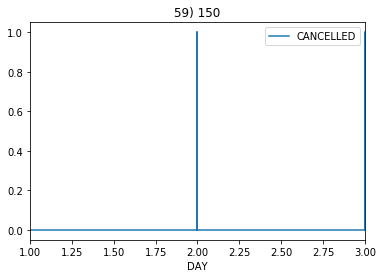

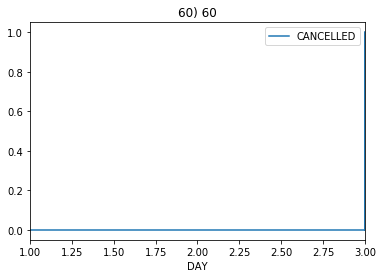

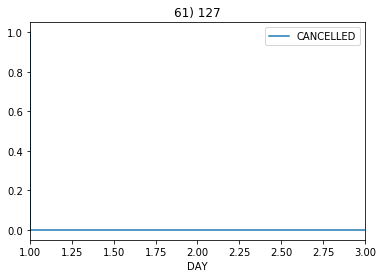

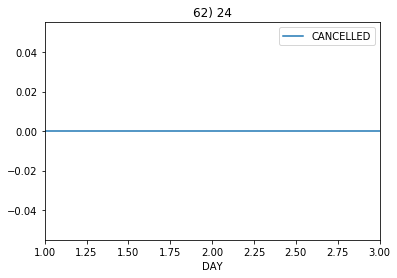

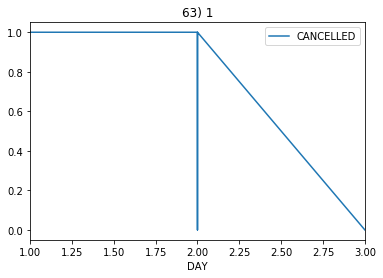

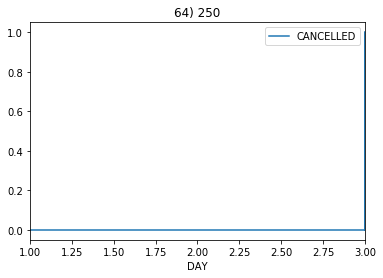

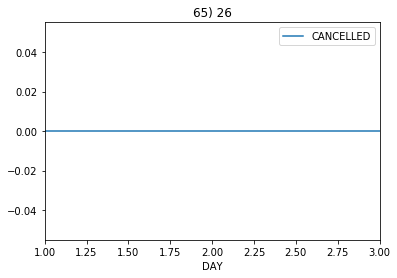

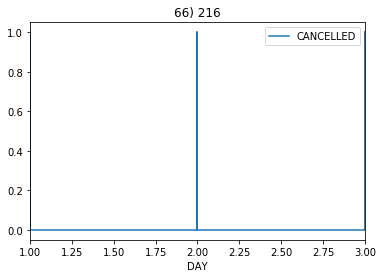

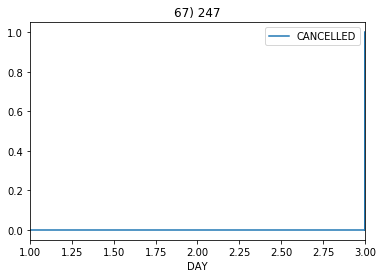

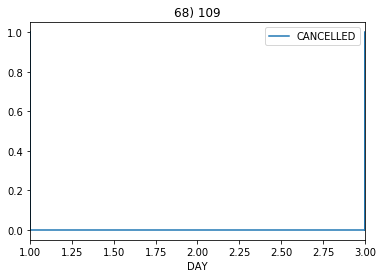

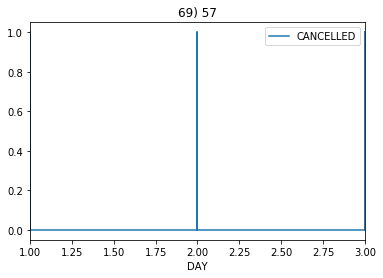

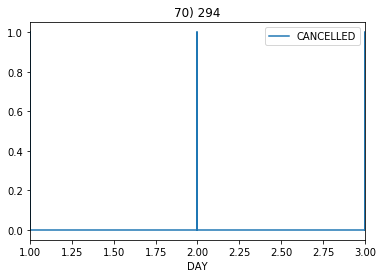

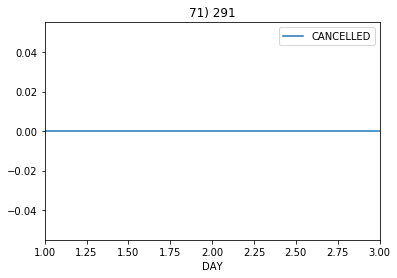

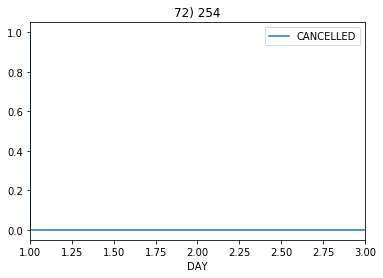

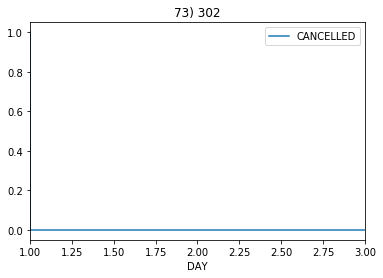

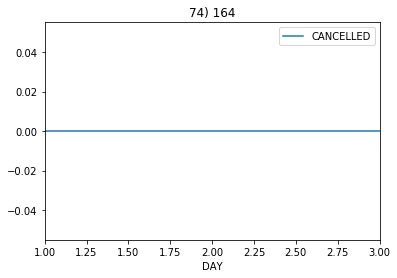

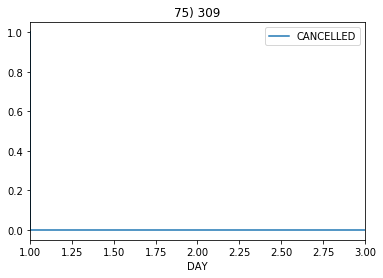

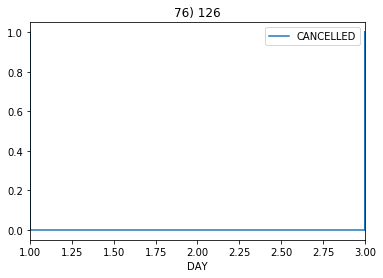

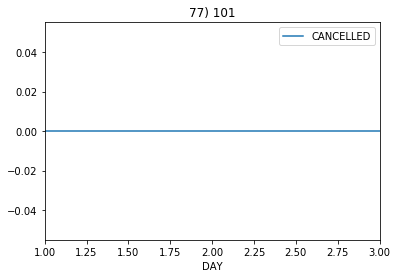

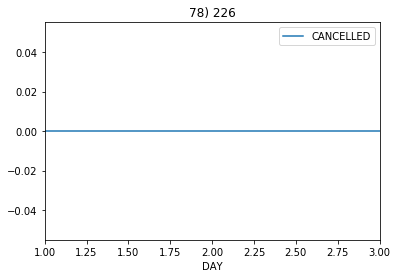

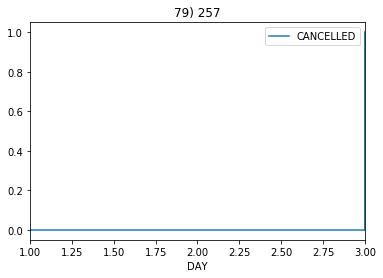

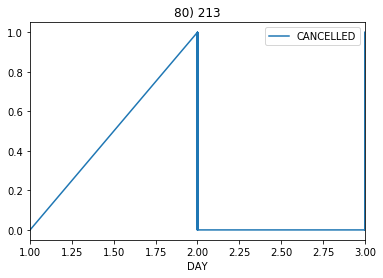

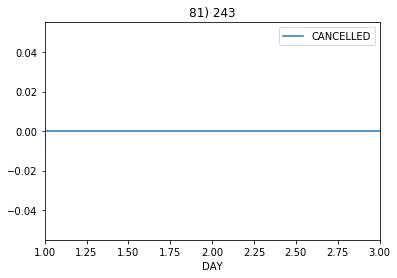

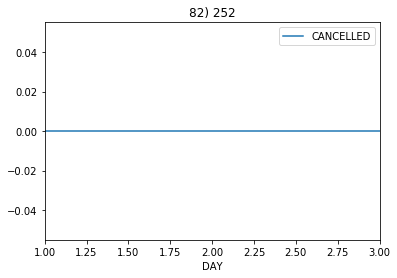

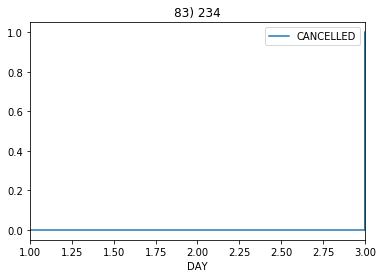

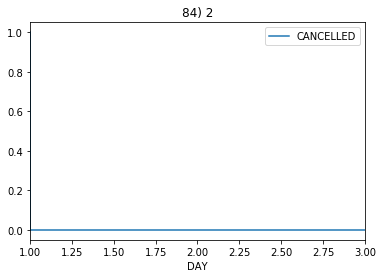

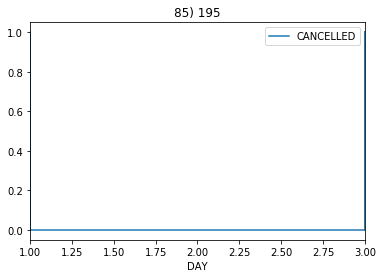

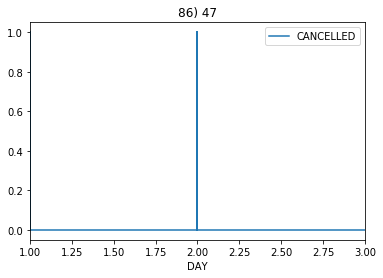

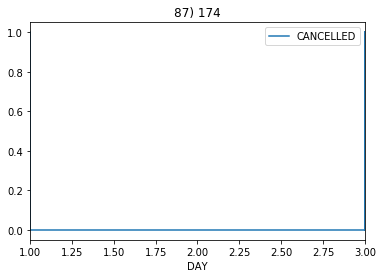

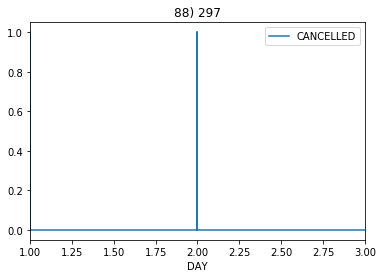

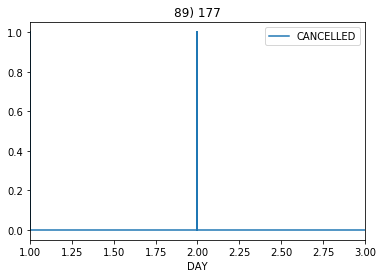

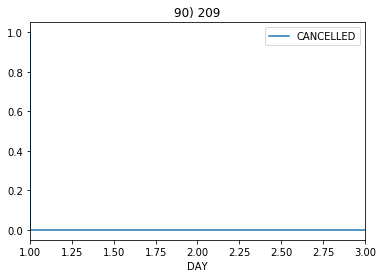

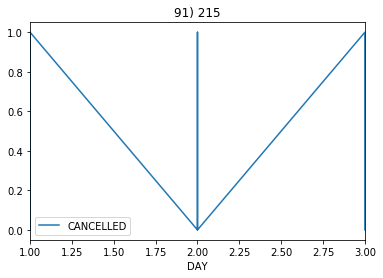

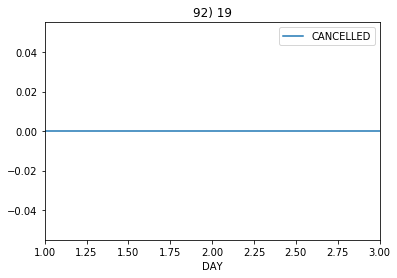

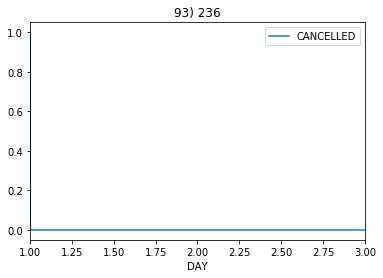

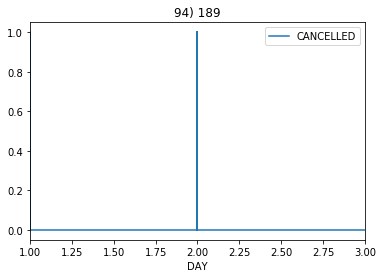

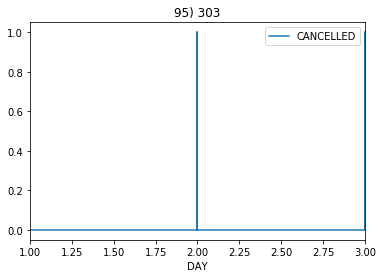

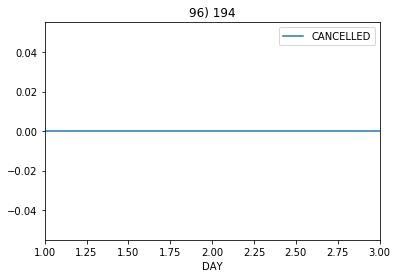

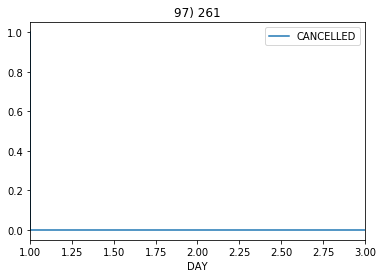

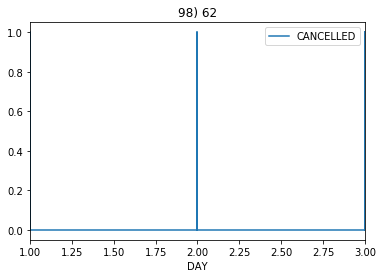

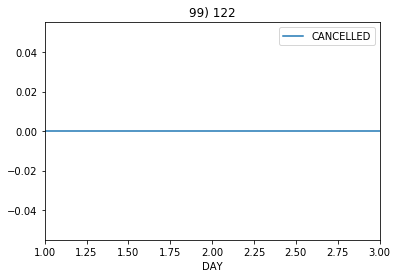

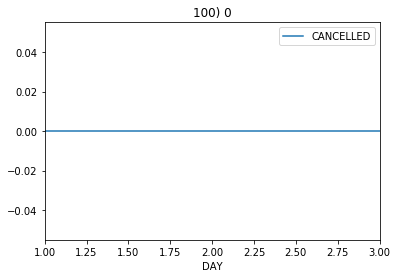

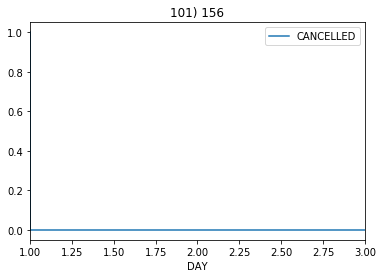

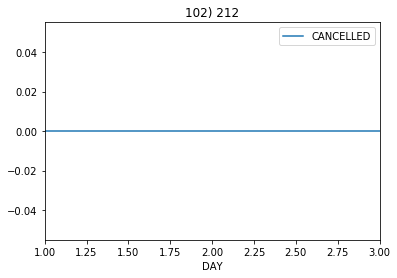

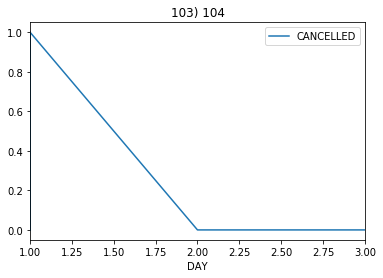

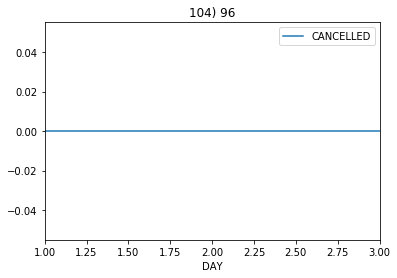

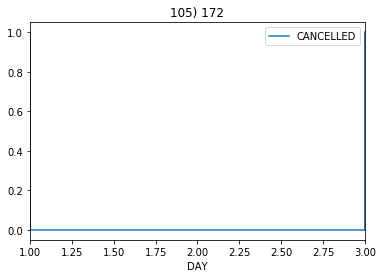

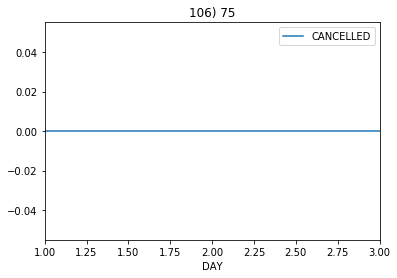

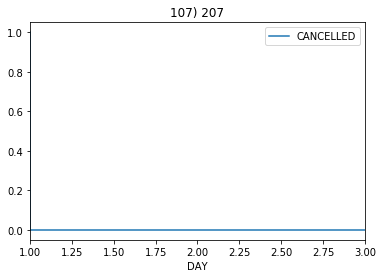

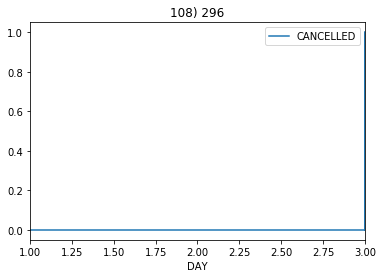

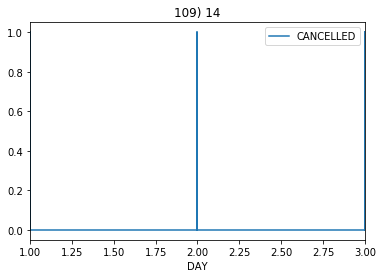

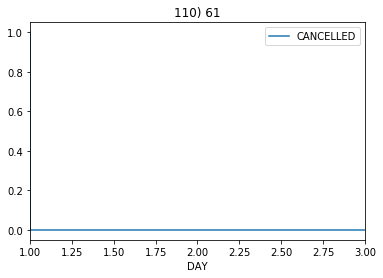

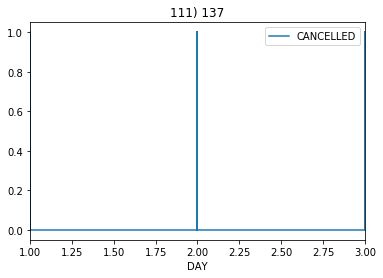

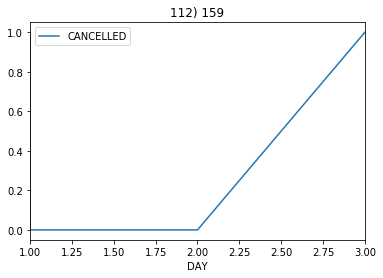

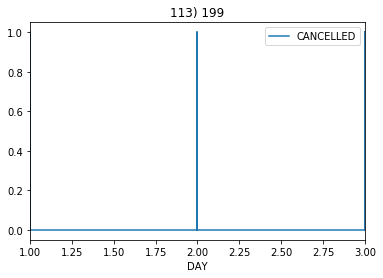

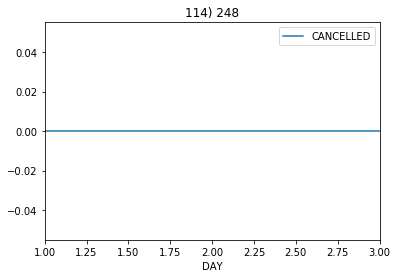

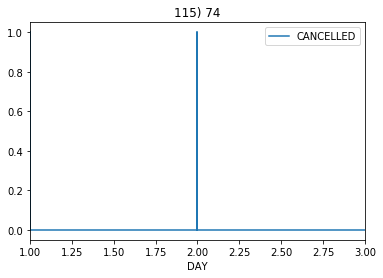

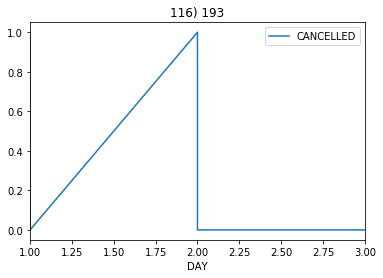

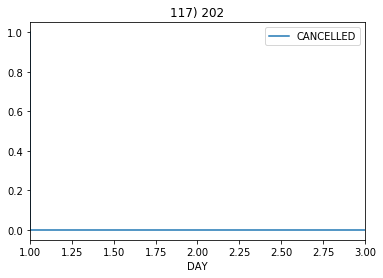

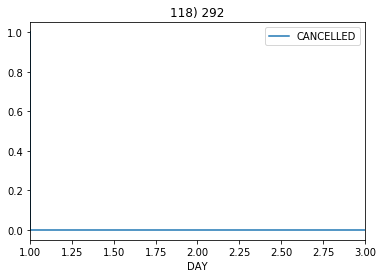

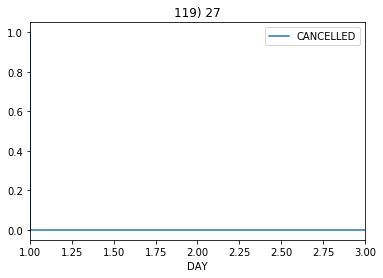

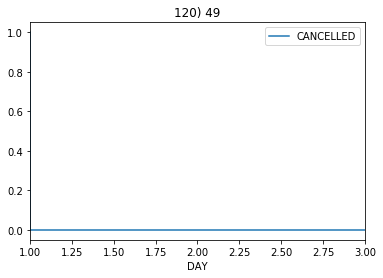

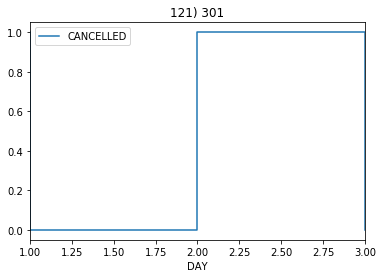

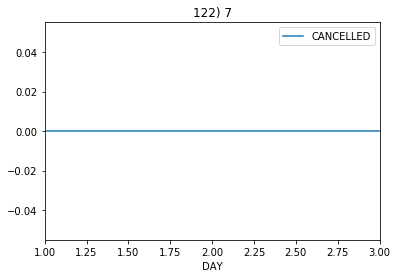

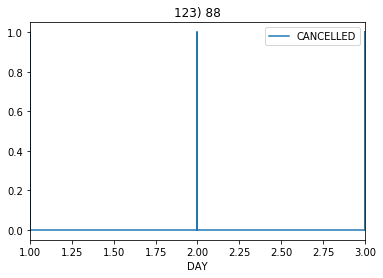

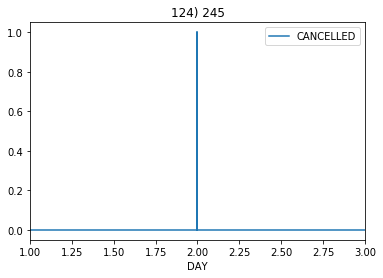

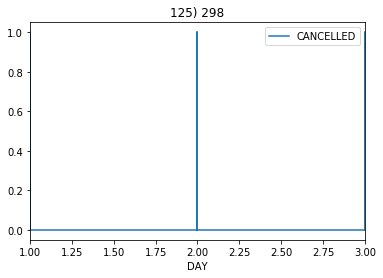

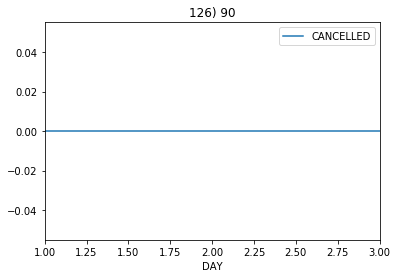

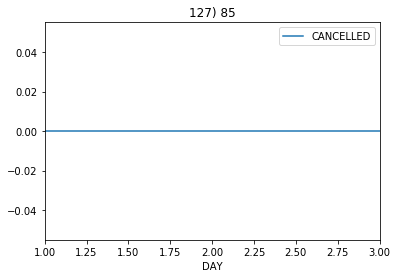

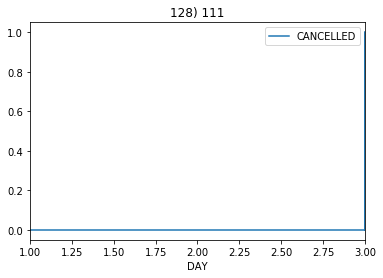

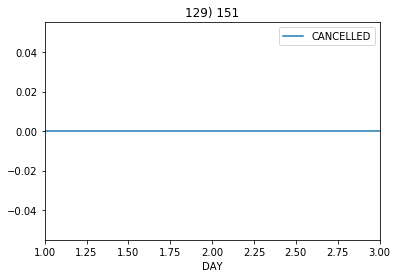

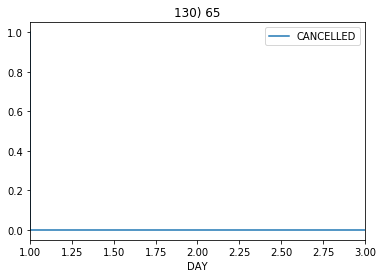

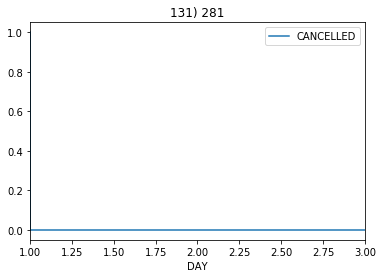

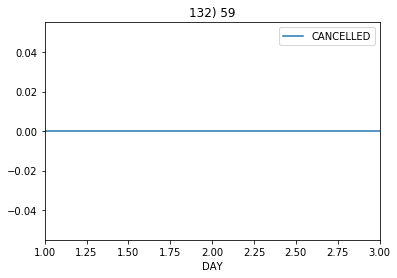

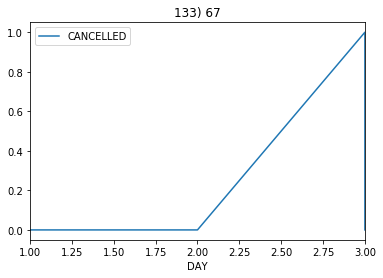

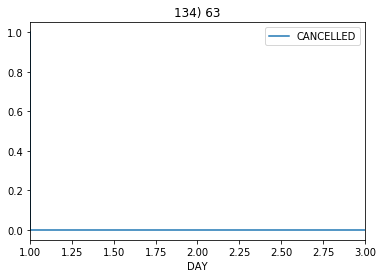

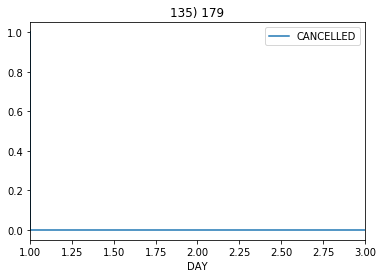

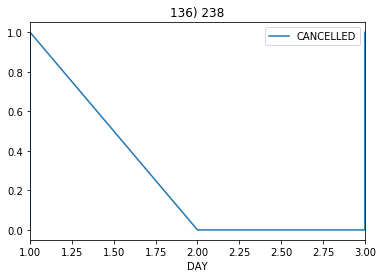

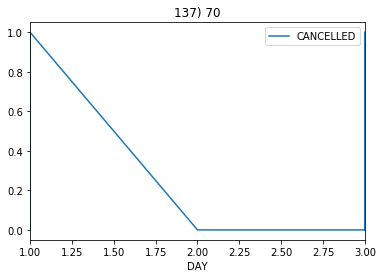

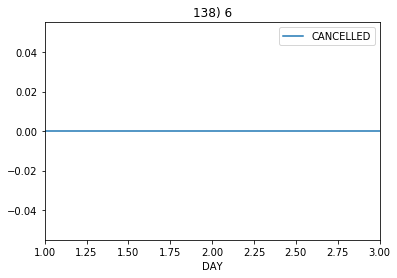

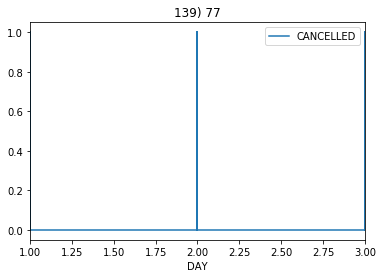

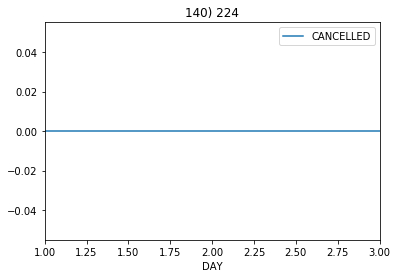

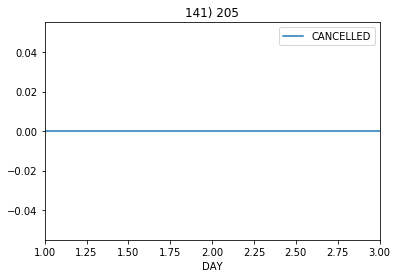

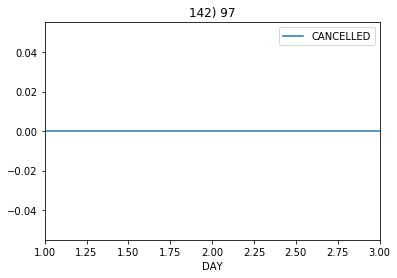

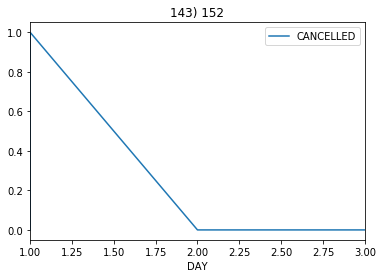

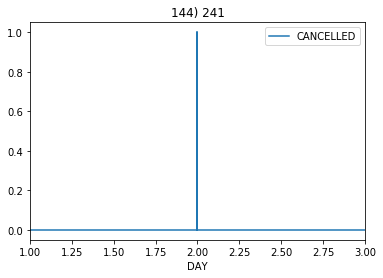

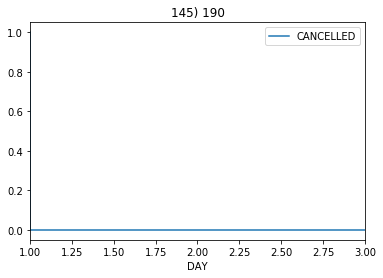

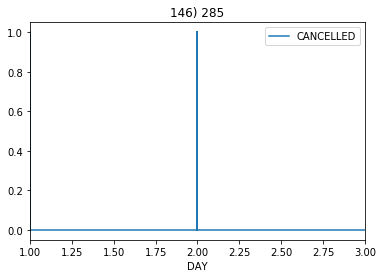

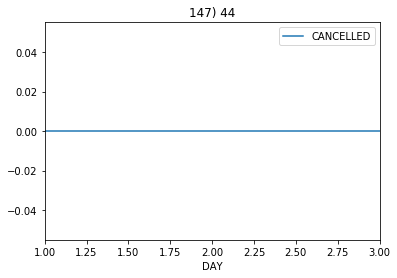

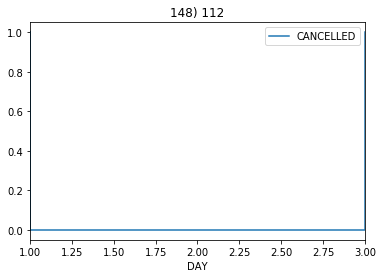

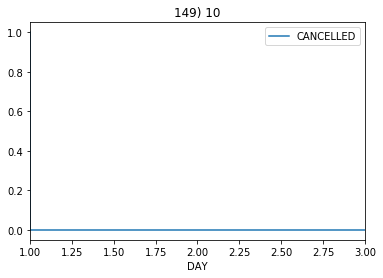

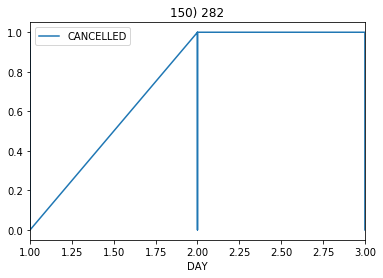

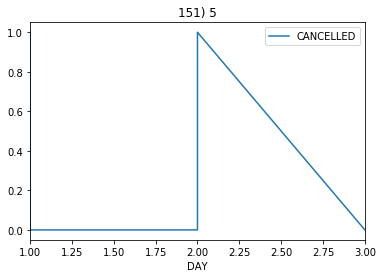

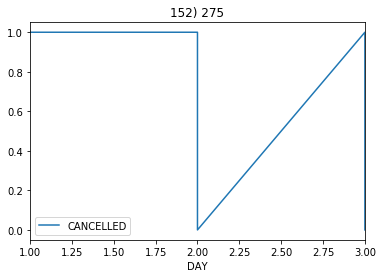

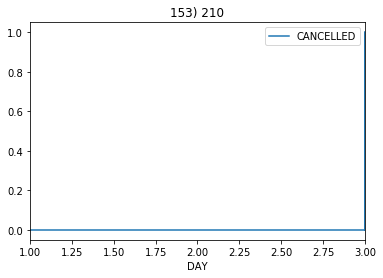

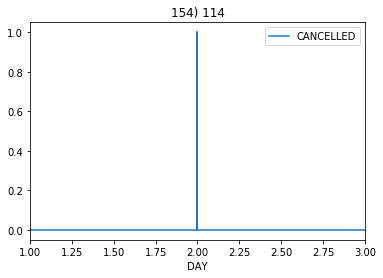

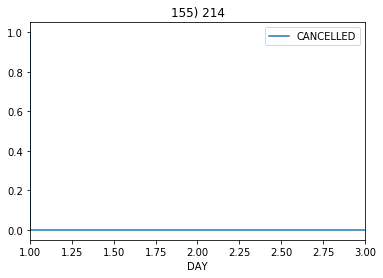

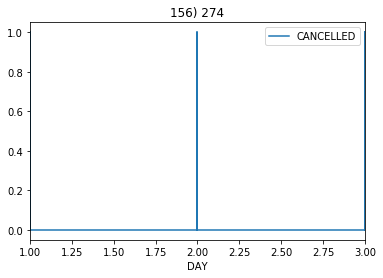

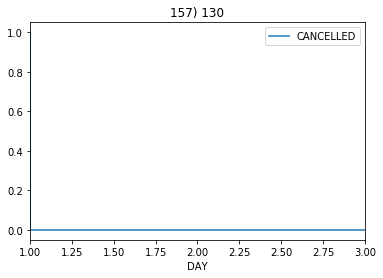

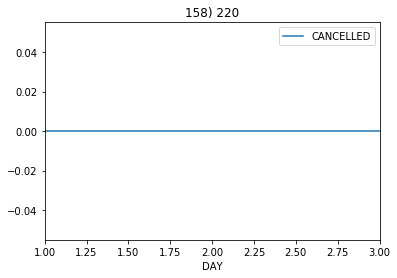

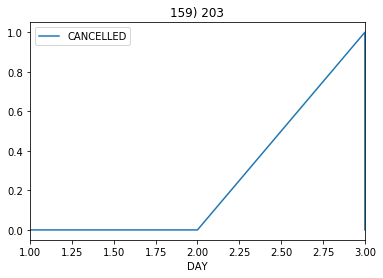

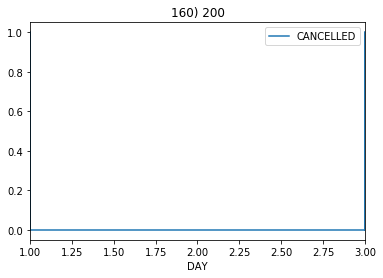

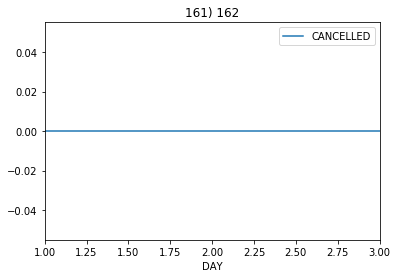

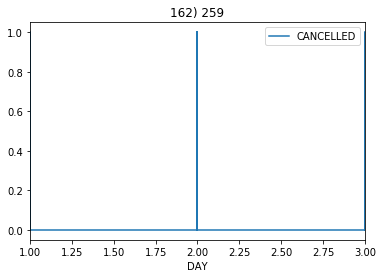

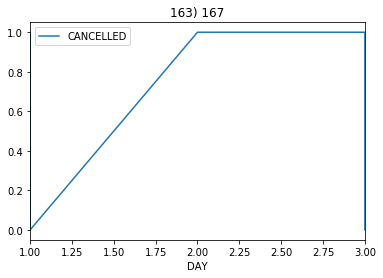

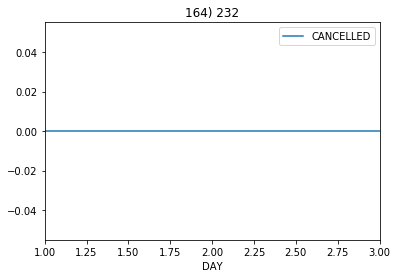

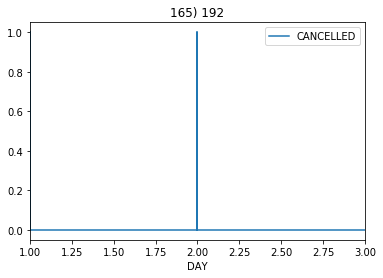

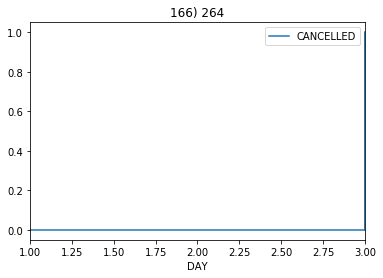

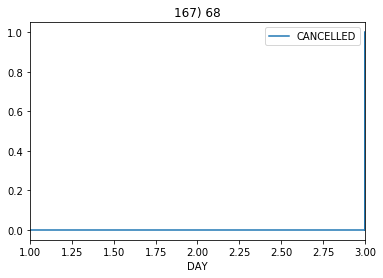

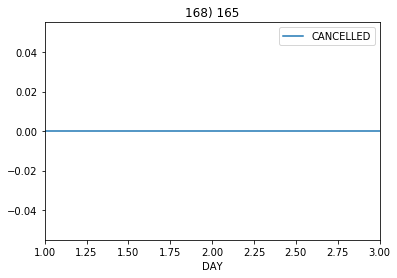

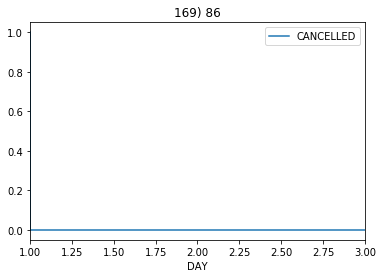

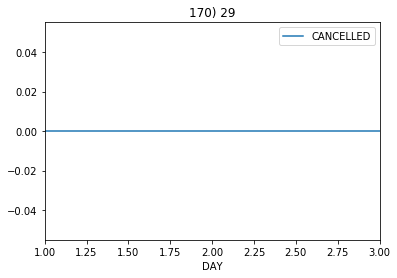

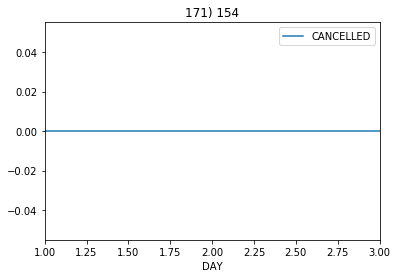

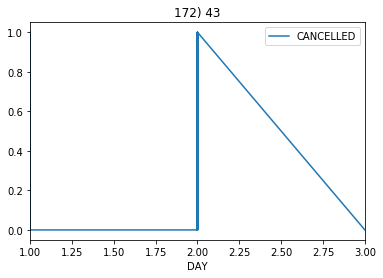

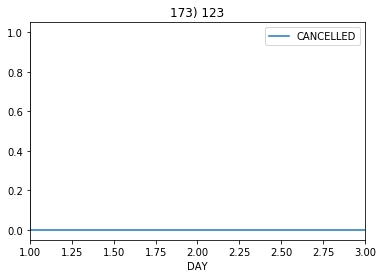

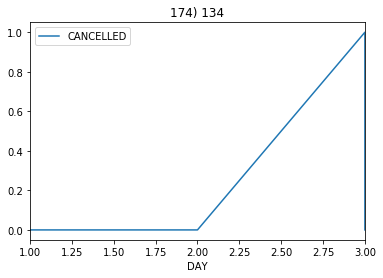

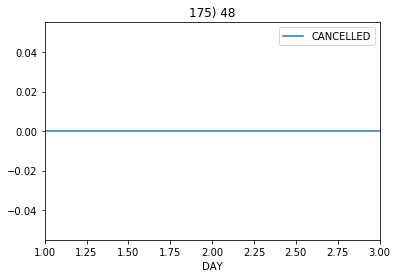

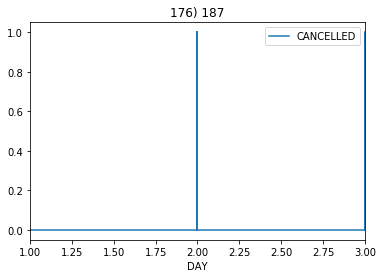

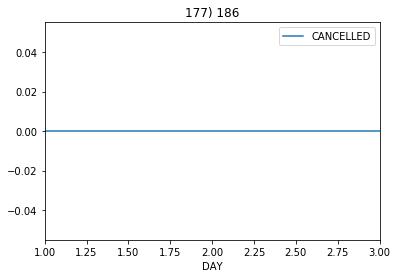

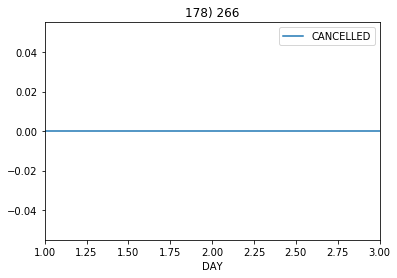

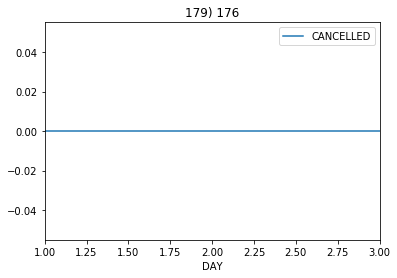

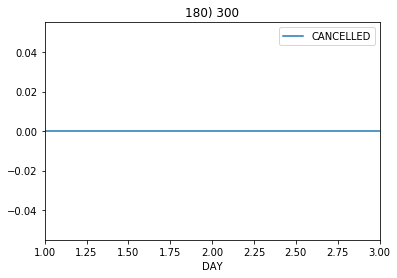

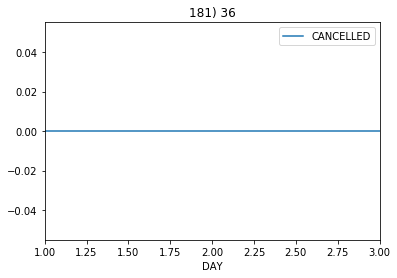

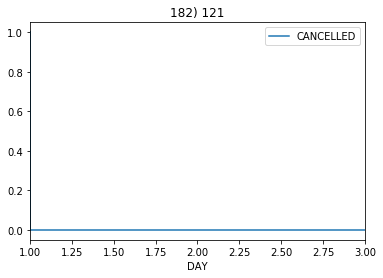

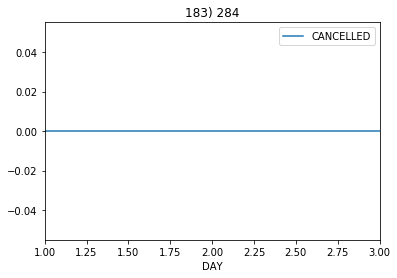

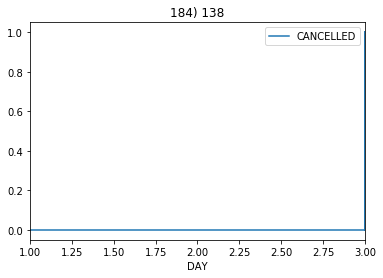

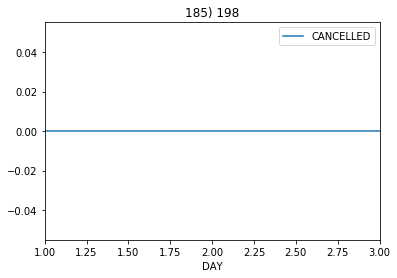

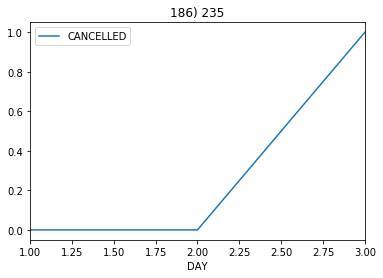

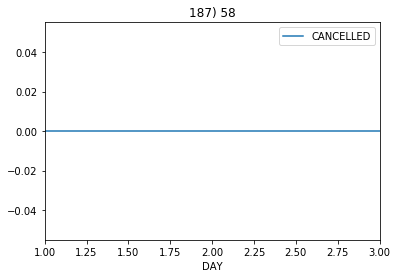

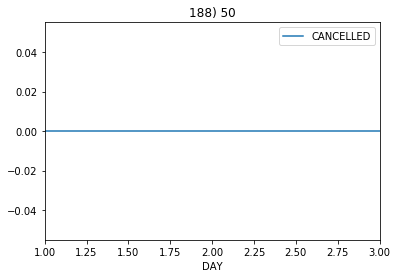

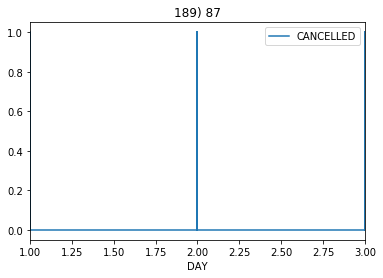

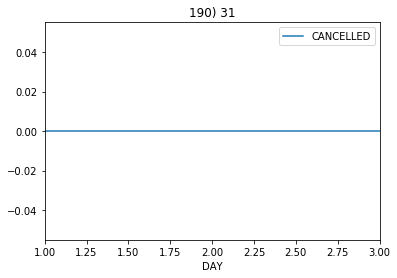

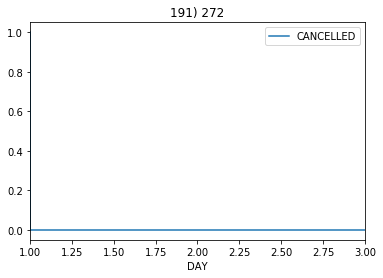

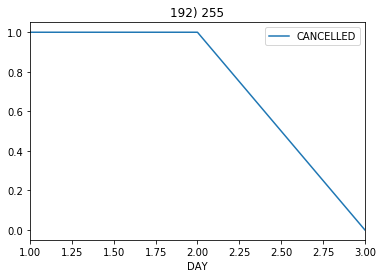

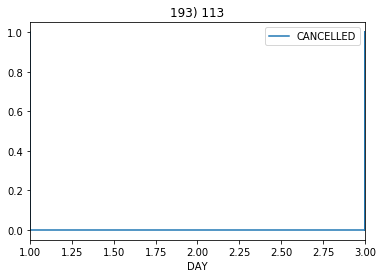

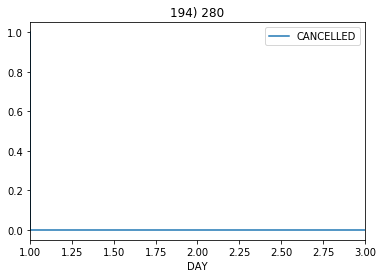

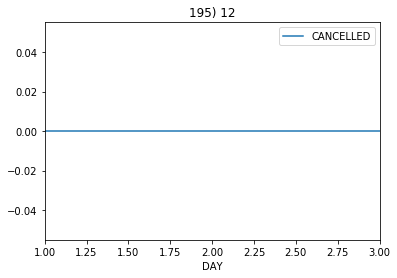

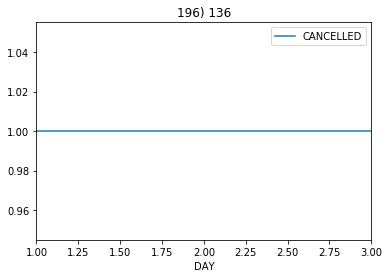

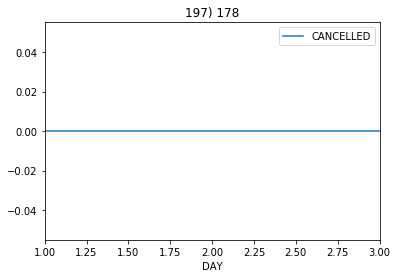

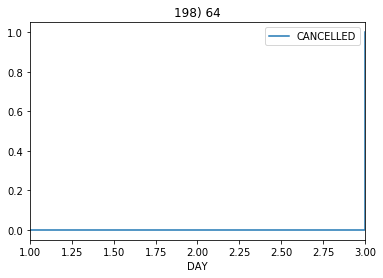

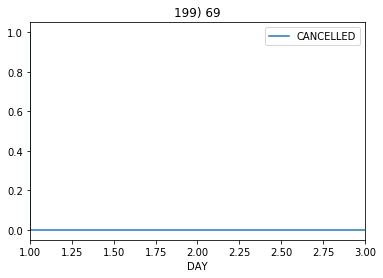

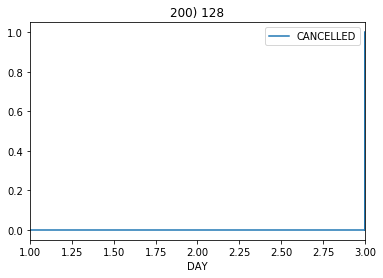

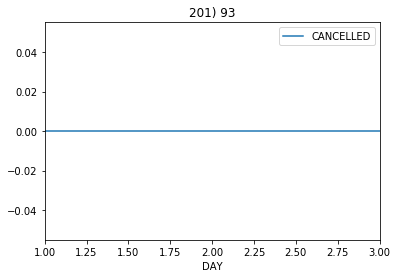

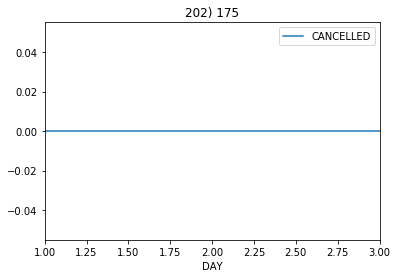

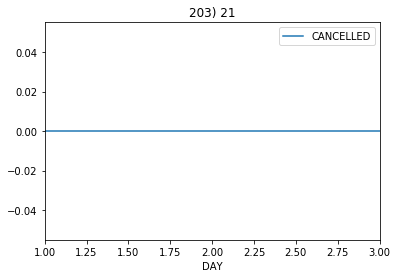

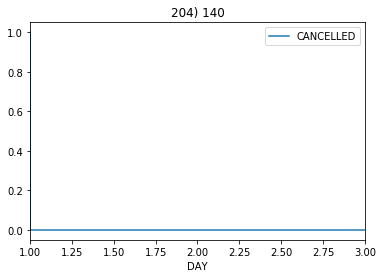

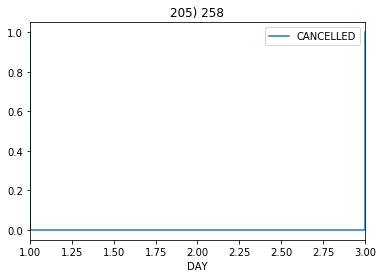

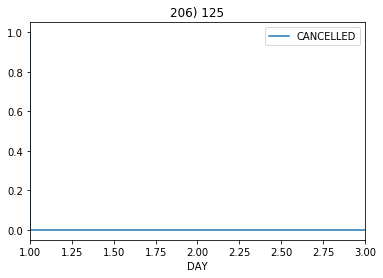

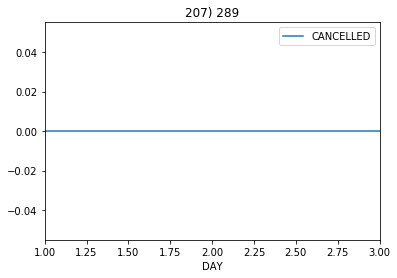

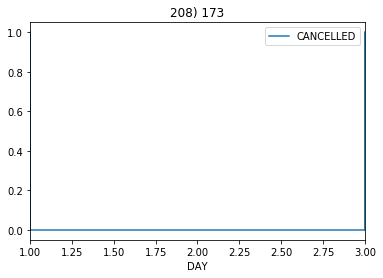

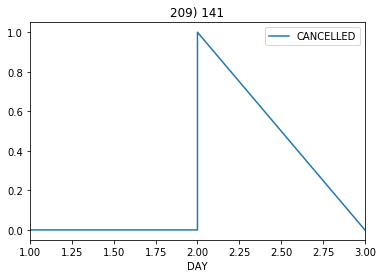

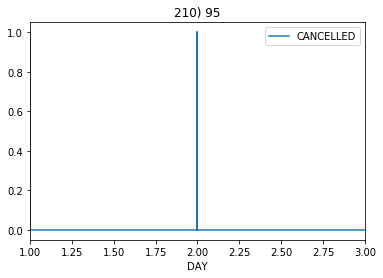

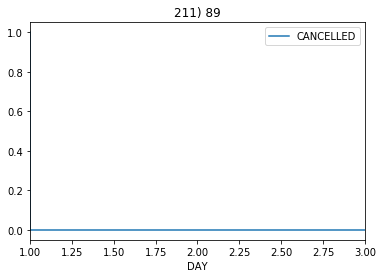

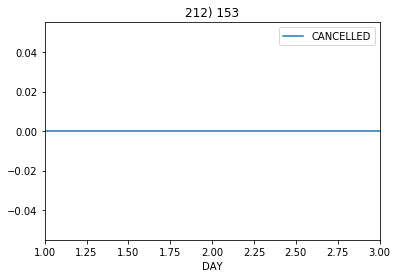

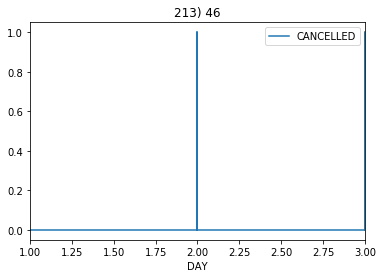

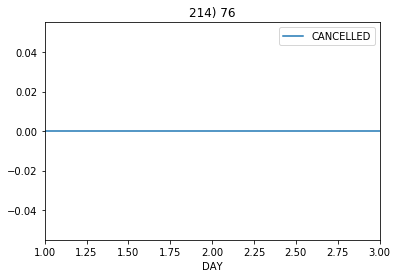

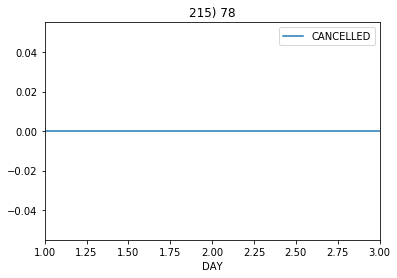

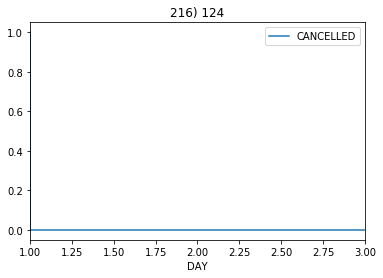

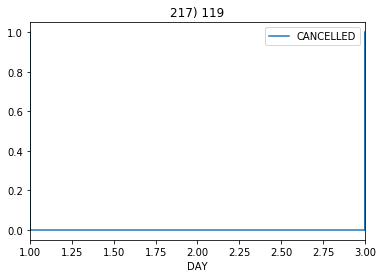

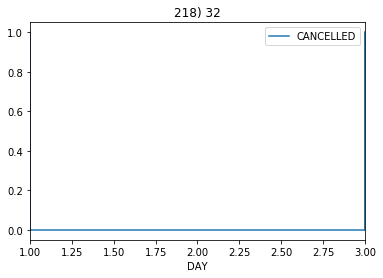

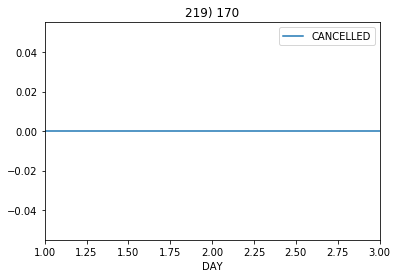

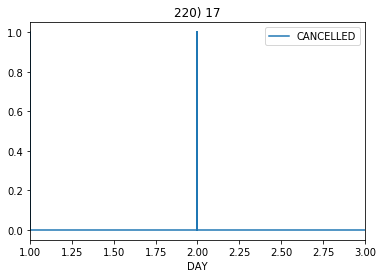

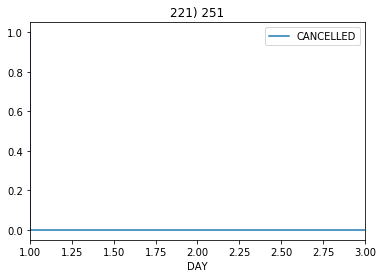

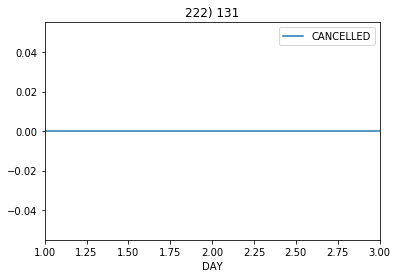

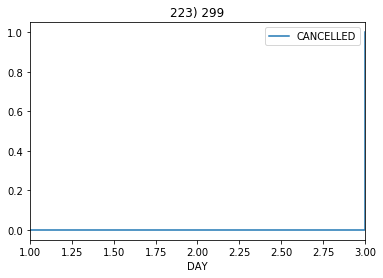

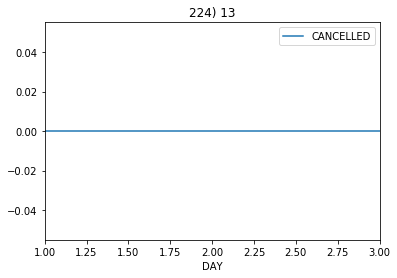

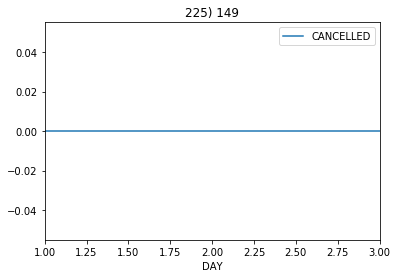

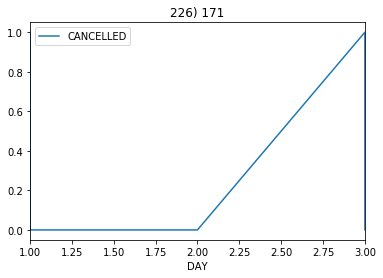

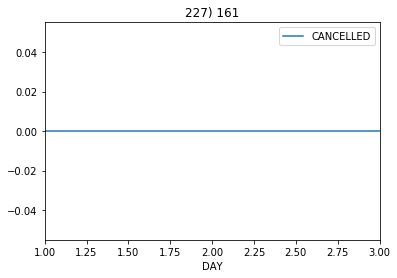

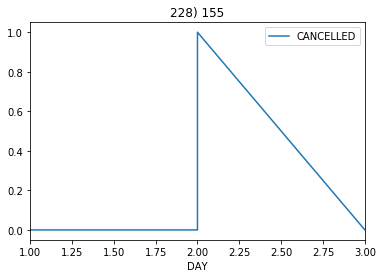

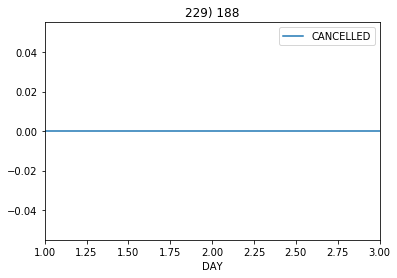

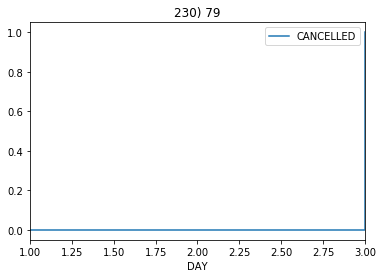

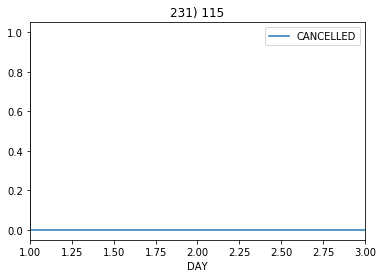

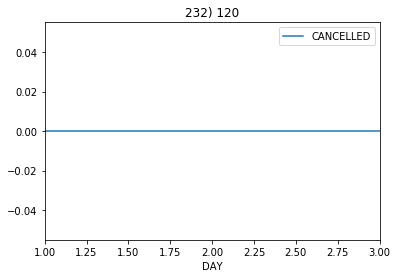

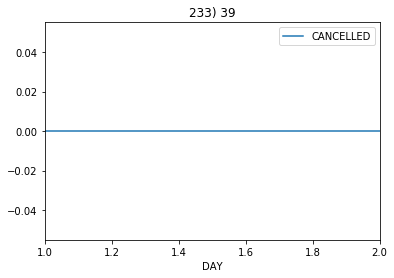

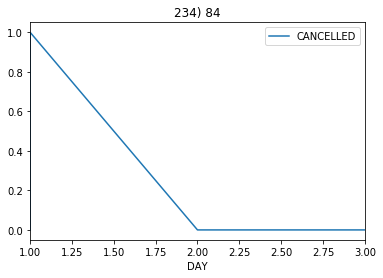

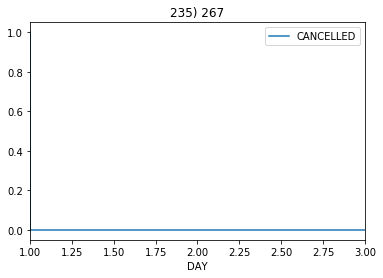

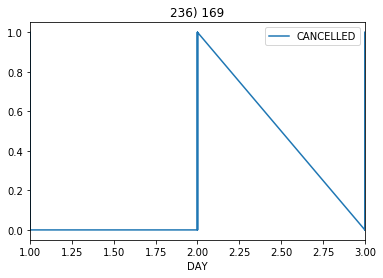

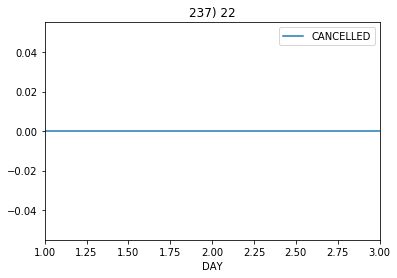

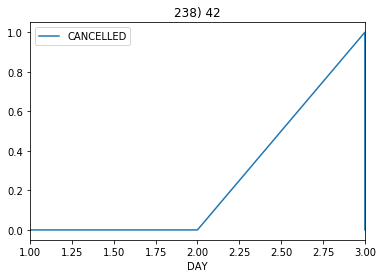

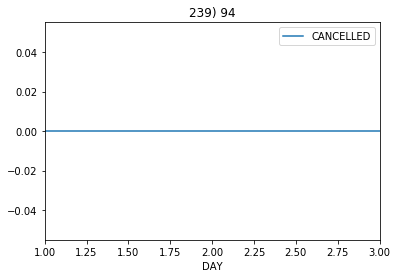

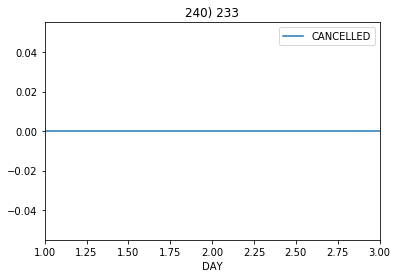

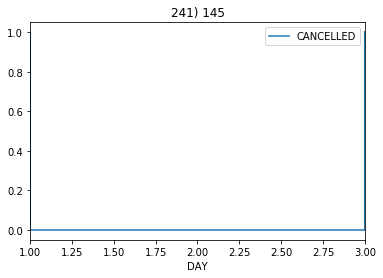

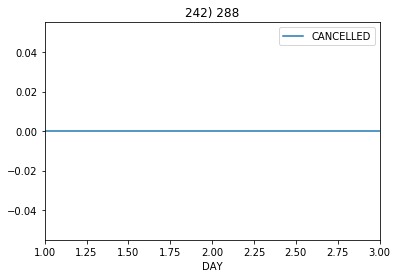

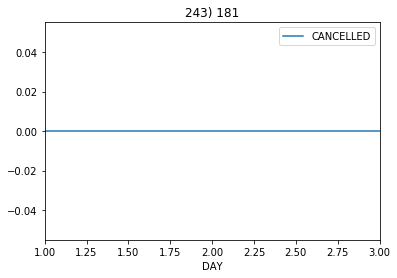

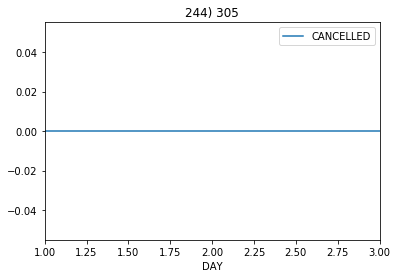

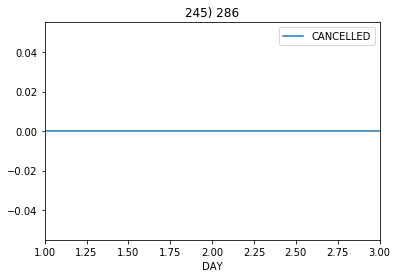

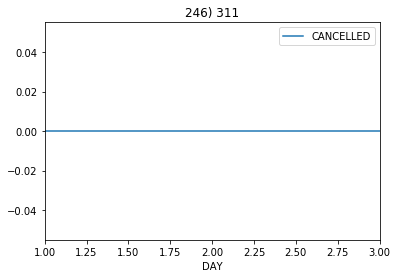

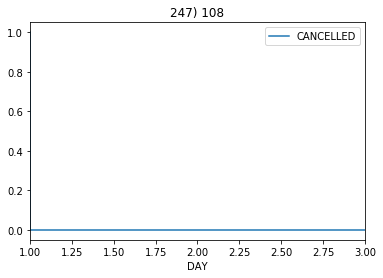

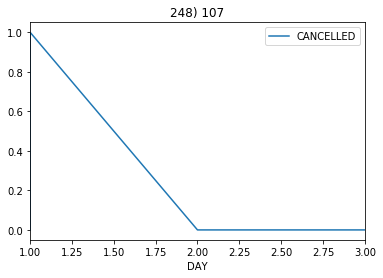

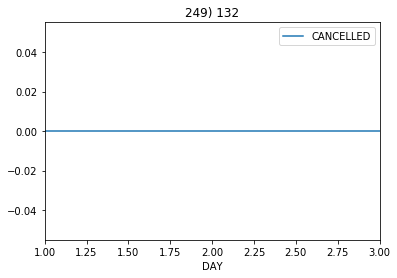

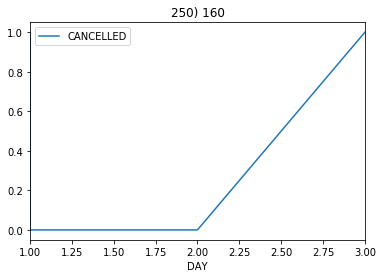

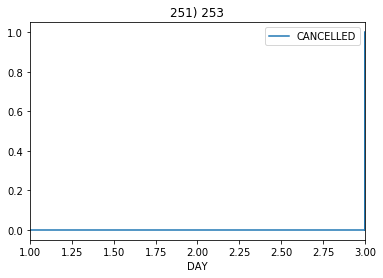

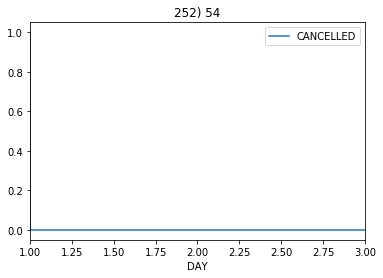

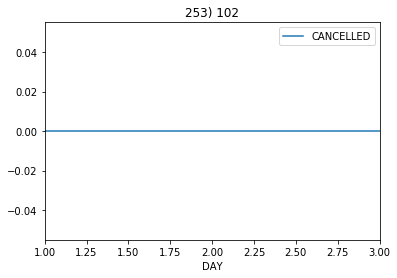

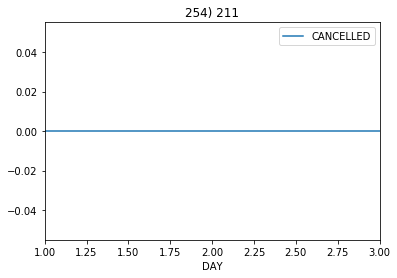

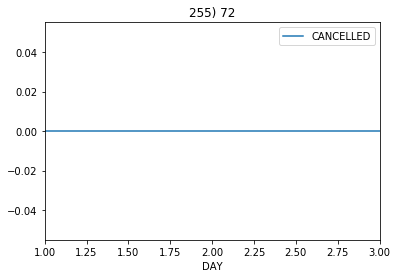

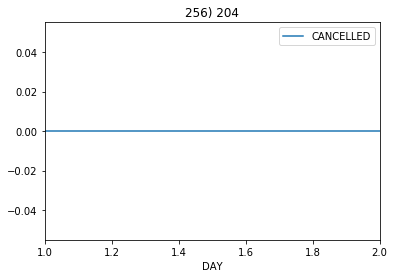

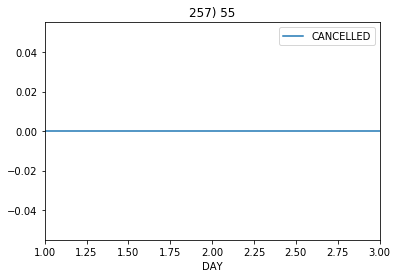

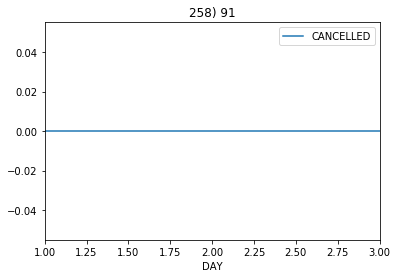

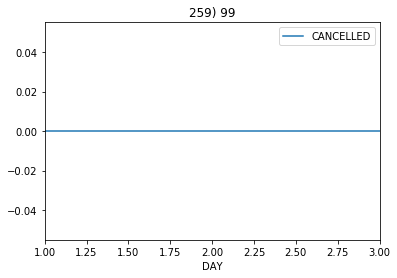

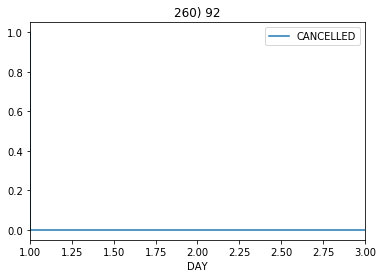

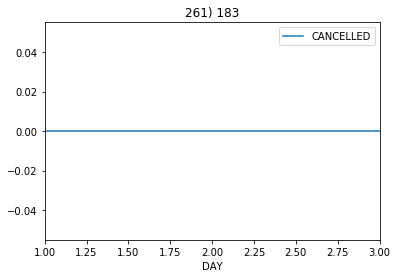

D:\My\MO\WinPython-64bit-3.5.4.0Qt5\python-3.5.4.amd64\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


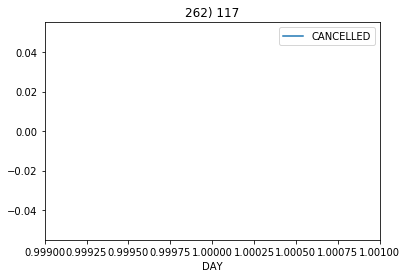

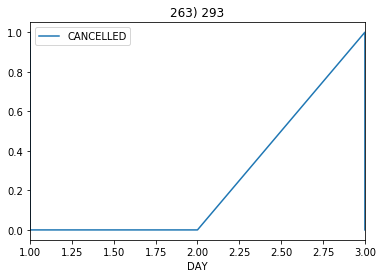

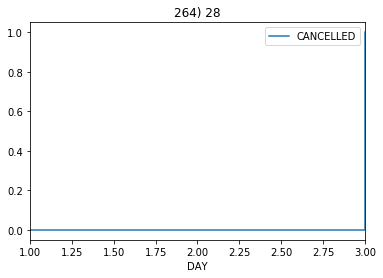

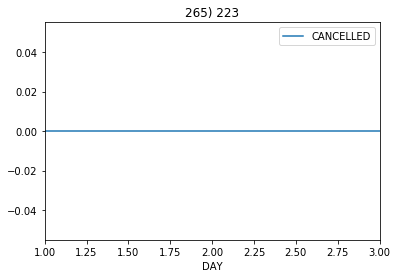

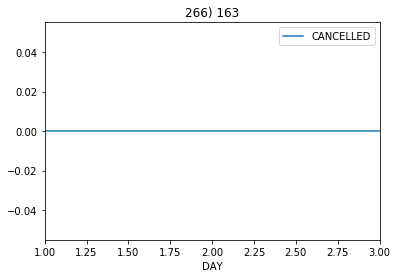

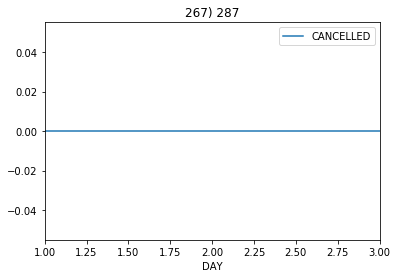

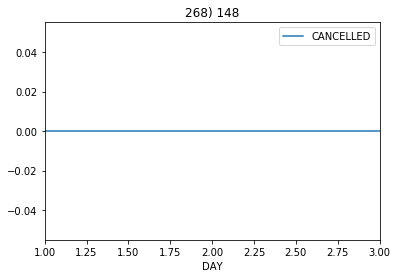

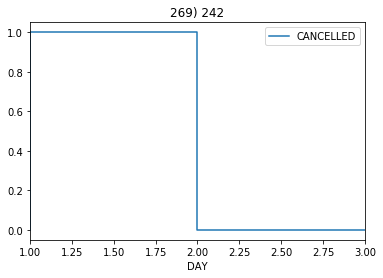

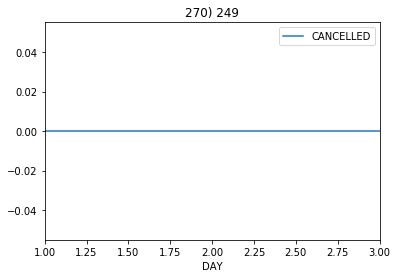

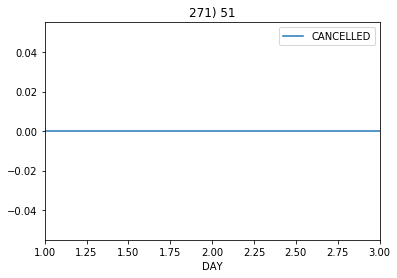

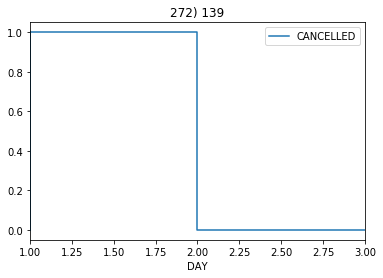

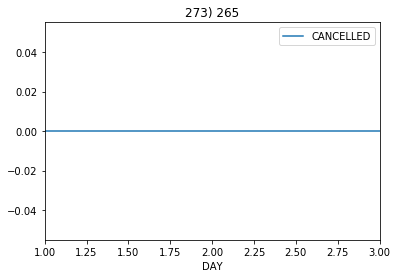

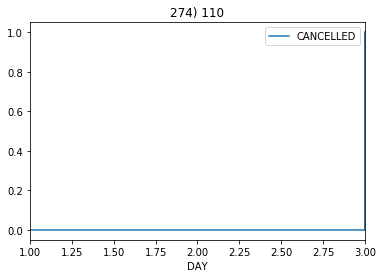

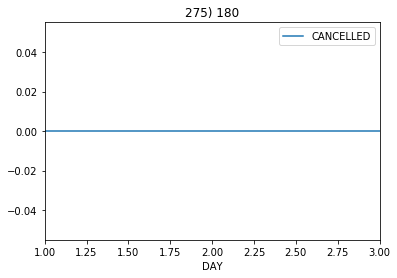

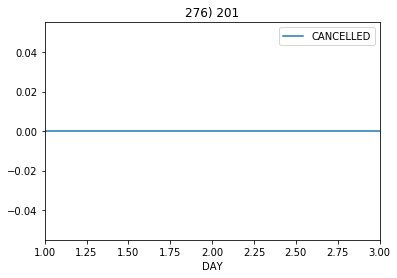

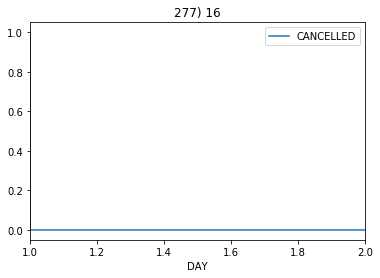

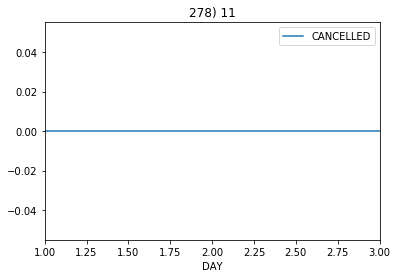

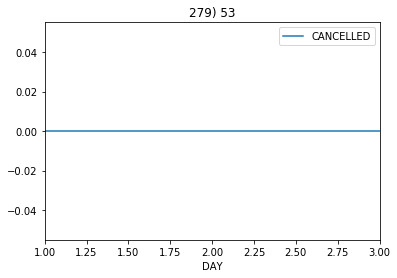

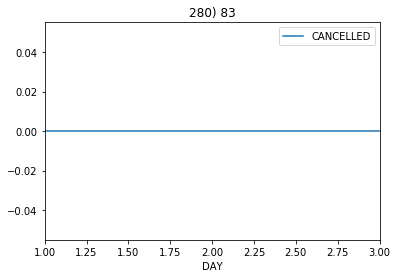

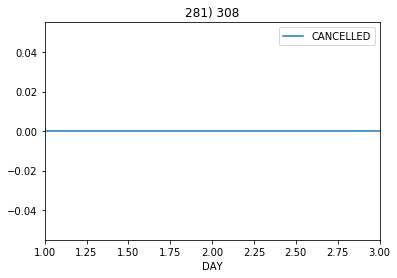

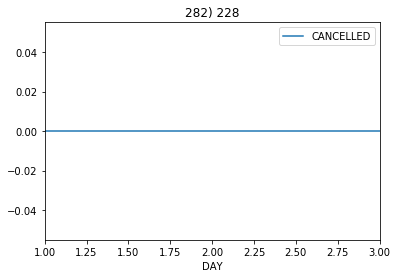

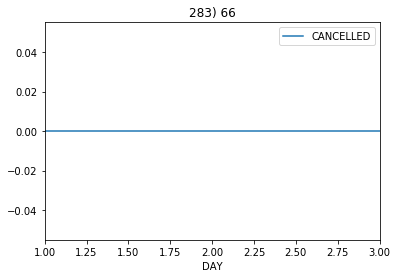

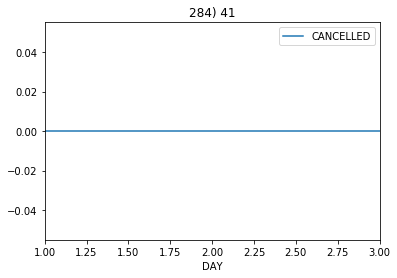

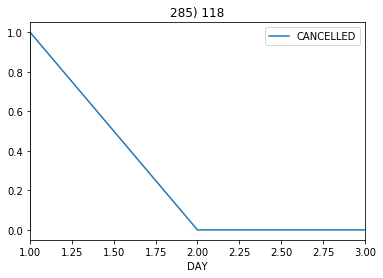

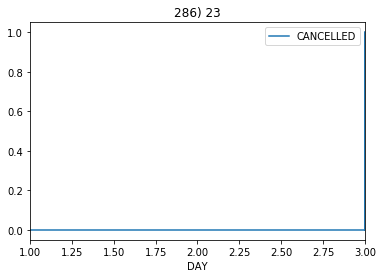

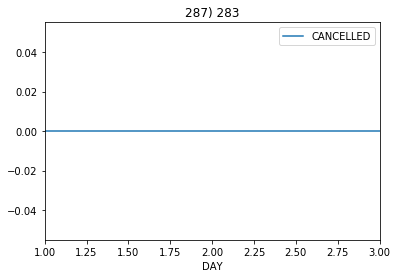

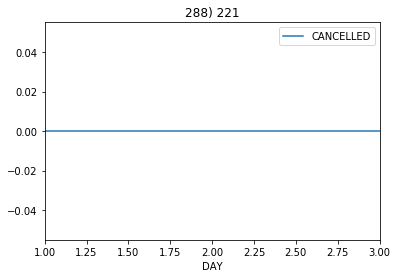

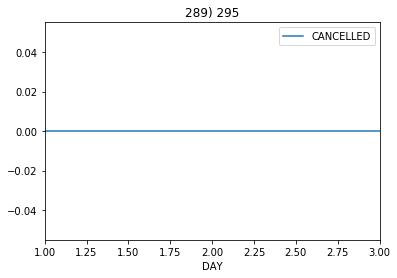

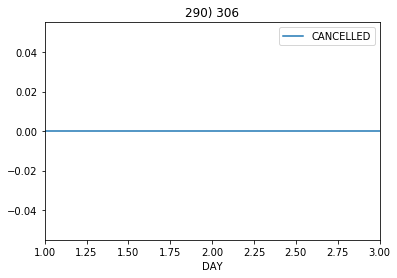

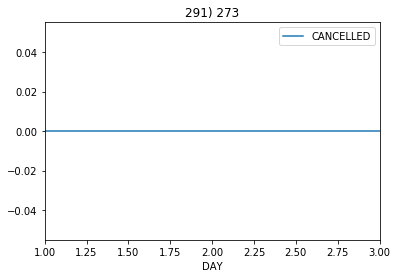

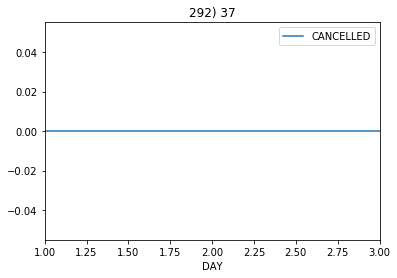

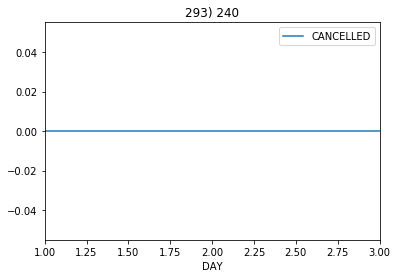

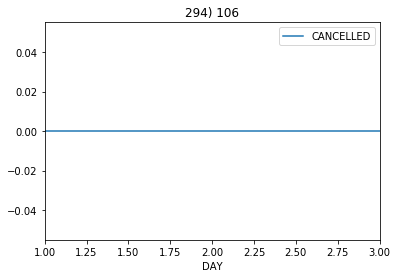

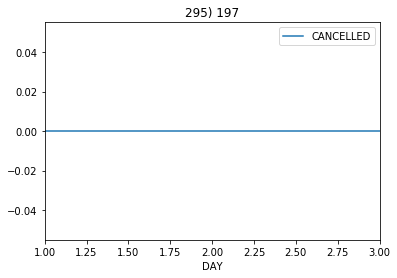

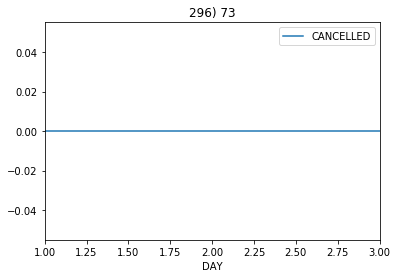

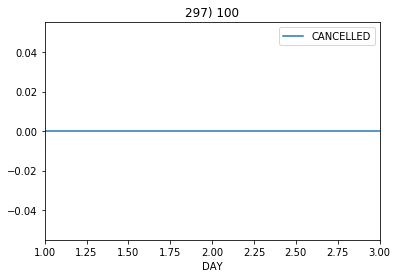

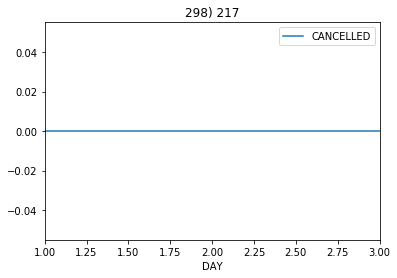

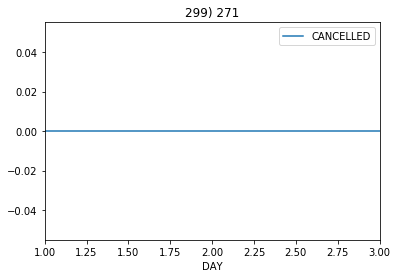

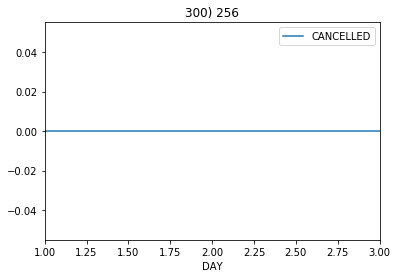

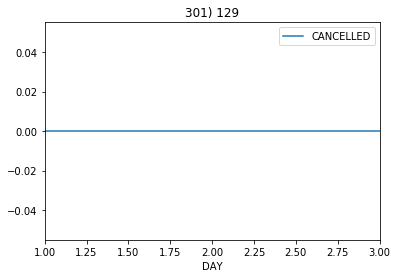

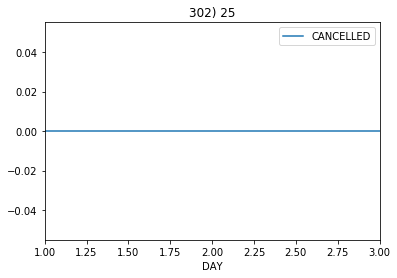

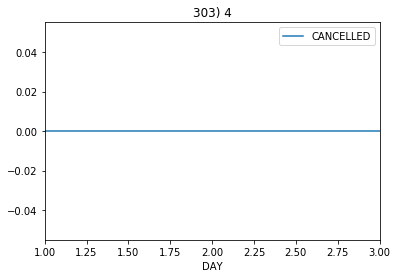

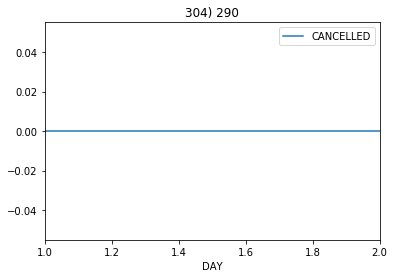

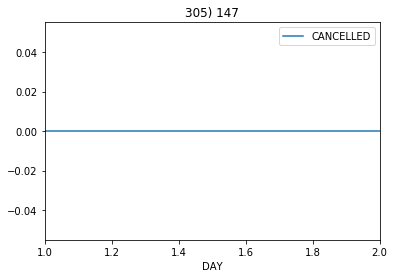

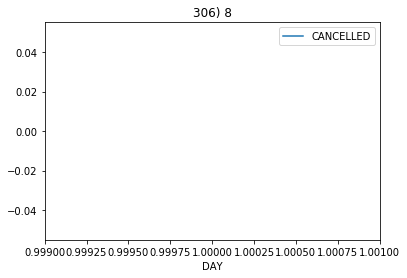

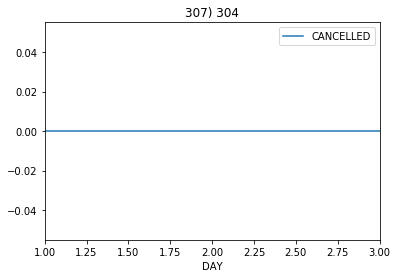

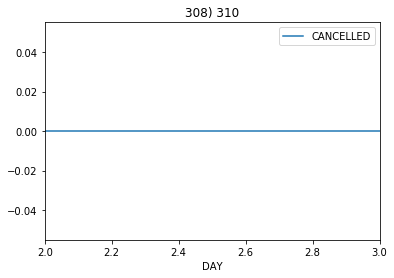

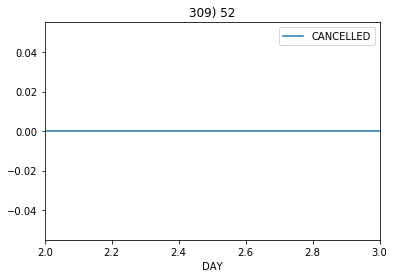

D:\My\MO\WinPython-64bit-3.5.4.0Qt5\python-3.5.4.amd64\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  'left=%s, right=%s') % (left, right))


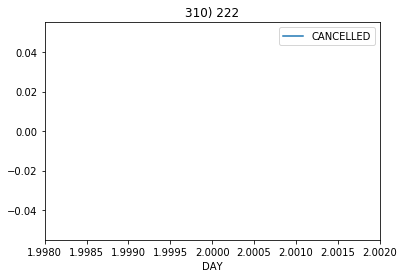

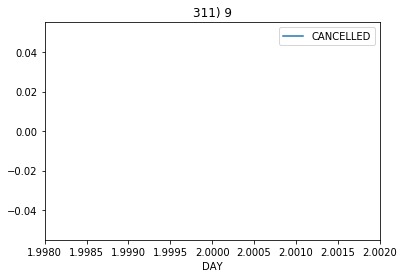

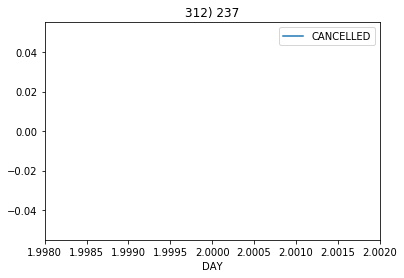

In [30]:
# 6
arrSD1 = tuple(df_flights['ORIGIN_AIRPORT'].unique())
for i in range(0,len(arrSD1)):
    df = df_flights[['ORIGIN_AIRPORT','DAY','CANCELLED']]
    df = df[df['ORIGIN_AIRPORT'] == arrSD1[i]]  
    df.plot(x='DAY', y='CANCELLED', title=str(i+1) + ") " + str(arrSD1[i]))
    plt.show()

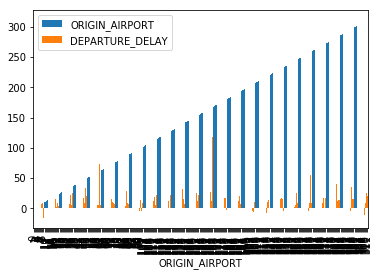

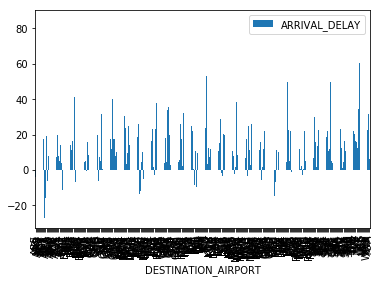

In [31]:
# 7
df_flights.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','DEPARTURE_DELAY'].mean().dropna().plot(kind='bar') 
df_flights.groupby('DESTINATION_AIRPORT')['DESTINATION_AIRPORT','ARRIVAL_DELAY'].mean().dropna().plot(kind='bar') 
plt.show()

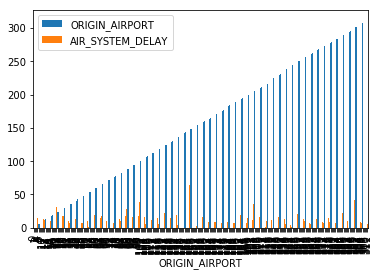

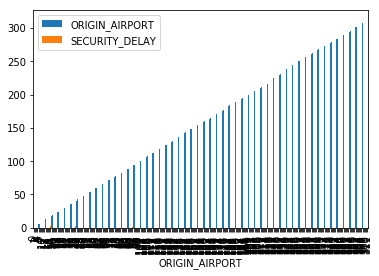

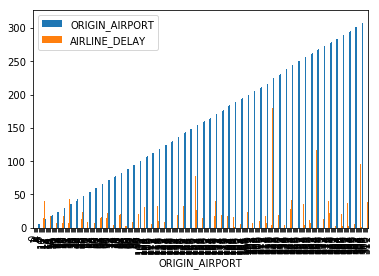

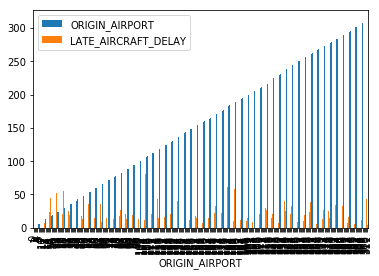

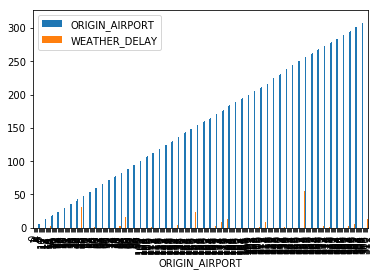

In [32]:
# 8
df_air = df_flights['AIR_SYSTEM_DELAY']
df_sec = df_flights['SECURITY_DELAY']
df_airl = df_flights['AIRLINE_DELAY']
df_late = df_flights['LATE_AIRCRAFT_DELAY']
df_weat = df_flights['WEATHER_DELAY']            

df_air = df_air.dropna().reset_index(drop=True)
df_sec = df_sec.dropna().reset_index(drop=True)
df_airl = df_airl.dropna().reset_index(drop=True)
df_late = df_late.dropna().reset_index(drop=True)
df_weat = df_weat.dropna().reset_index(drop=True)


df_flights.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','AIR_SYSTEM_DELAY'].mean().dropna().plot(kind='bar') 
df_flights.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','SECURITY_DELAY'].mean().dropna().plot(kind='bar')
df_flights.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','AIRLINE_DELAY'].mean().dropna().plot(kind='bar')
df_flights.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','LATE_AIRCRAFT_DELAY'].mean().dropna().plot(kind='bar')    
df_flights.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','WEATHER_DELAY'].mean().dropna().plot(kind='bar')
plt.legend()
plt.show()

In [33]:
# 9
airline_list = df_flights['AIRLINE'].unique()

print('Максимальные задержки рейсов по отправке')
delay_dict = {}
for airline in airline_list:
    delay = len(df_flights[(df_flights['DEPARTURE_DELAY'] == 1) & (df_flights['AIRLINE'] == airline)])
    print('airline', airline, '\t', delay)
    delay_dict[airline] = delay
    
print('Максимальные задержки рейсов по прибытию')
delay_dict = {}
for airline in airline_list:
    delay = len(df_flights[(df_flights['ARRIVAL_DELAY'] == 1) & (df_flights['AIRLINE'] == airline)])
    print('airline', airline, '\t', delay)
    delay_dict[airline] = delay
    
df3 = df_flights.groupby('AIRLINE')['ARRIVAL_DELAY'].sum().sort_values()
print("Максимальные задержки рейсов по прибытию у авиакомпании " + str(df3.index[len(df3)-1]))
df3 = df_flights.groupby('AIRLINE')['DEPARTURE_DELAY'].sum().sort_values()
print("Максимальные задержки рейсов по отправке у авиакомпании " + str(df3.index[len(df3)-1]))

Максимальные задержки рейсов по отправке
airline 1 	 38
airline 0 	 94
airline 11 	 89
airline 3 	 162
airline 8 	 12
airline 10 	 109
airline 6 	 17
airline 2 	 37
airline 9 	 83
airline 4 	 103
airline 7 	 38
airline 5 	 8
airline 13 	 336
airline 12 	 15
Максимальные задержки рейсов по прибытию
airline 1 	 27
airline 0 	 64
airline 11 	 54
airline 3 	 89
airline 8 	 11
airline 10 	 60
airline 6 	 23
airline 2 	 46
airline 9 	 82
airline 4 	 101
airline 7 	 24
airline 5 	 11
airline 13 	 188
airline 12 	 15
Максимальные задержки рейсов по прибытию у авиакомпании 13
Максимальные задержки рейсов по отправке у авиакомпании 13
